# Importação das Biblioecas

In [115]:
%pip install pandas seaborn imbalanced-learn
import pandas as pd
import seaborn as sns
import yfinance as yf
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Aplicar o SMOTE para balancear as classes
smote = SMOTE(random_state=42)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Importar os Dados

### Dados trimestrais

In [116]:
quarterly_reports = pd.read_csv("./../assets/dados.csv")
coluns_to_remove = list(filter(lambda colum: 'Unnamed' in colum, quarterly_reports.columns))
quarterly_reports = quarterly_reports.drop(columns=coluns_to_remove)
quarterly_reports[quarterly_reports.isna()] = 0
quarterly_reports.to_csv("./../assets/dados.csv")
ticker = pd.read_csv("./../assets/url.csv")['Nome'] + '11'
quarterly_reports['ticker'] = ticker
print(len(coluns_to_remove),coluns_to_remove)
quarterly_reports

1 ['Unnamed: 0']


,1.2.1 sum,1.2.1 mean,1.2.1 count,1.2.1 stdr,1.2.2 sum,1.2.2 mean,1.2.2 count,1.2.2 stdr,1.2.11 sum,1.2.11 mean,...,qualquer stdr,3.1.1 sum,3.1.1 mean,3.1.1 count,3.1.1 stdr,3.1.2 sum,3.1.2 mean,3.1.2 count,3.1.2 stdr,ticker
0,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
1,4475406.0,4475406.0,1.0,443065194.0,1.567401e+08,5.805189e+06,27.0,5.747137e+08,73738202.72,4.915880e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
2,4688049.6,4688049.6,1.0,464116910.4,1.532604e+08,6.966381e+06,22.0,6.897587e+08,76949517.70,5.496394e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
3,4183639.2,4183639.2,1.0,414180280.8,1.374460e+08,5.286383e+06,26.0,5.233519e+08,64210190.22,4.013137e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
4,0.0,0.0,0.0,0.0,1.748127e+08,1.165418e+07,15.0,1.153764e+09,50223493.13,8.370582e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,AAZQ11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
229,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
230,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11
231,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.00,0.000000e+00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RZEO11


In [117]:
data_ticker = pd.DataFrame()
for ticker in quarterly_reports['ticker'].unique():
    tag = ticker + ".SA"
    print(tag)
    temp_data_ticker = yf.download(tickers=tag, multi_level_index=False)
    temp_data_ticker['ticker'] = ticker
    data_ticker = pd.concat([data_ticker,temp_data_ticker])
data_ticker

AAZQ11.SA


[*********************100%***********************]  1 of 1 completed


AGRX11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AGRX11.SA']: YFInvalidPeriodError("AGRX11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


BBGO11.SA


[*********************100%***********************]  1 of 1 completed


CPTR11.SA


[*********************100%***********************]  1 of 1 completed


CRAA11.SA


[*********************100%***********************]  1 of 1 completed


DCRA11.SA


[*********************100%***********************]  1 of 1 completed


EGAF11.SA


[*********************100%***********************]  1 of 1 completed


FGAA11.SA


[*********************100%***********************]  1 of 1 completed


FLEM11.SA


404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/FLEM11.SA?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=FLEM11.SA&crumb=HfvPT0ZmDRa
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FLEM11.SA']: AttributeError("'NoneType' object has no attribute 'update'")


FZDB11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['FZDB11.SA']: YFInvalidPeriodError("FZDB11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


GCRA11.SA


[*********************100%***********************]  1 of 1 completed


GRWA11.SA


[*********************100%***********************]  1 of 1 completed


HGAG11.SA


[*********************100%***********************]  1 of 1 completed


IAAG11.SA


[*********************100%***********************]  1 of 1 completed


IAGR11.SA


[*********************100%***********************]  1 of 1 completed


JGPX11.SA


[*********************100%***********************]  1 of 1 completed


KNCA11.SA


[*********************100%***********************]  1 of 1 completed


KOPA11.SA


[*********************100%***********************]  1 of 1 completed


LSAG11.SA


[*********************100%***********************]  1 of 1 completed


NCRA11.SA


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['NCRA11.SA']: YFInvalidPeriodError("NCRA11.SA: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


OIAG11.SA


[*********************100%***********************]  1 of 1 completed


PLCA11.SA


[*********************100%***********************]  1 of 1 completed


RURA11.SA


[*********************100%***********************]  1 of 1 completed


RZAG11.SA


[*********************100%***********************]  1 of 1 completed


RZEO11.SA


[*********************100%***********************]  1 of 1 completed


SNAG11.SA


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume,ticker,Adj Close
Date,,,,,,,
2022-12-21,6.999202,7.013159,6.978267,6.978267,78854.0,AAZQ11,NaN
2022-12-22,6.978269,7.117834,6.629355,7.117834,31942.0,AAZQ11,NaN
2022-12-23,6.978269,6.978269,6.838703,6.978269,6389.0,AAZQ11,NaN
2022-12-26,6.964312,7.041073,6.873595,7.041073,38590.0,AAZQ11,NaN
2022-12-27,6.768921,6.964312,6.559573,6.964312,21828.0,AAZQ11,NaN
...,...,...,...,...,...,...,...
2025-04-25,9.640000,9.650000,9.570000,9.640000,0.0,SNAG11,NaN
2025-04-28,9.650000,9.670000,9.600000,9.640000,0.0,SNAG11,NaN
2025-04-29,9.640000,9.760000,9.620000,9.670000,0.0,SNAG11,NaN


In [118]:
data_ticker_label = data_ticker.reset_index()
data_ticker_label['Date'] = data_ticker_label['Date'].dt.to_period('M')
data_ticker_label = data_ticker_label.groupby(by=['ticker','Date']).var()
data_ticker_label = data_ticker_label.drop(columns=['Close','High','Low','Volume','Adj Close'])
data_ticker_label = data_ticker_label.reset_index()
data_ticker_label

,ticker,Date,Open
0,AAZQ11,2022-12,0.011244
1,AAZQ11,2023-01,0.014352
2,AAZQ11,2023-02,0.003305
3,AAZQ11,2023-03,0.001440
4,AAZQ11,2023-04,0.006627
...,...,...,...
703,SNAG11,2025-01,0.014899
704,SNAG11,2025-02,0.007978
705,SNAG11,2025-03,0.002596
706,SNAG11,2025-04,0.020555


In [119]:
data_ticker_label['Open'].describe()

count      683.000000
mean        34.244297
std        496.248451
min          0.000000
25%          0.007210
50%          0.076493
75%          0.659866
max      12317.899726
Name: Open, dtype: float64

<Axes: xlabel='Open'>

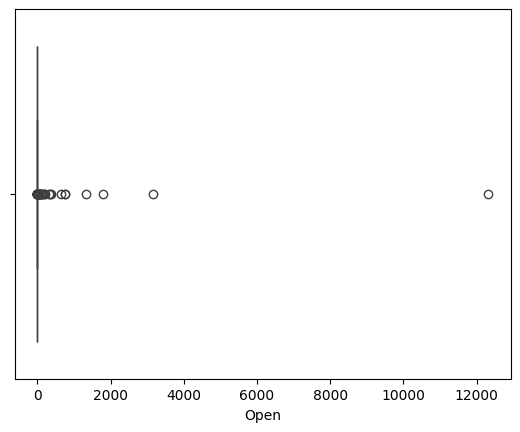

In [120]:
sns.boxplot(x=data_ticker_label['Open'])

<Axes: xlabel='Open'>

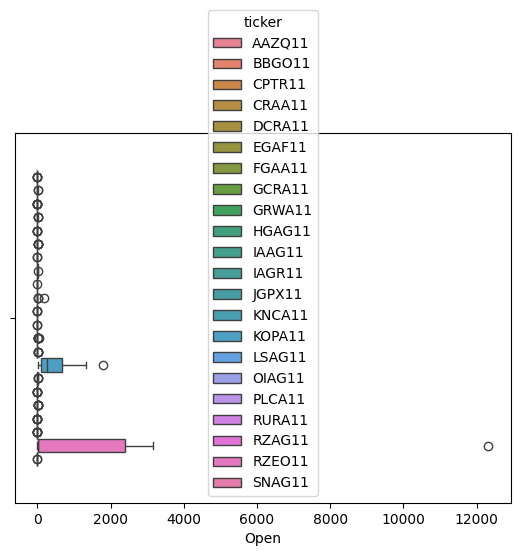

In [121]:
sns.boxplot(x=data_ticker_label['Open'],hue=data_ticker_label['ticker'])

<Axes: xlabel='Open', ylabel='Count'>

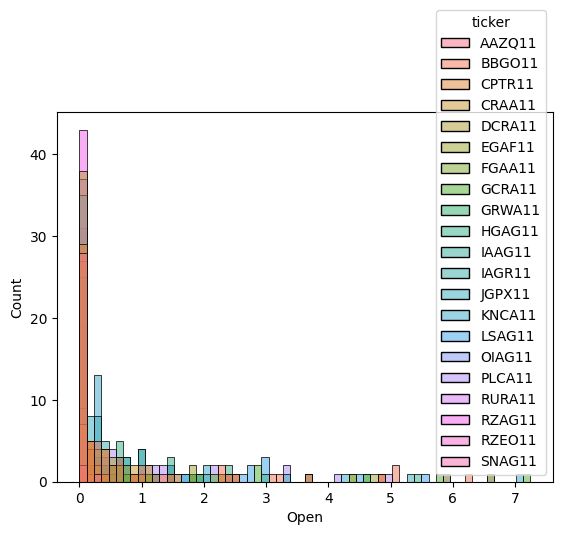

In [122]:
graph_data_ticker = data_ticker_label[data_ticker_label['Open'] < 8]
sns.histplot(x=graph_data_ticker['Open'], hue=graph_data_ticker['ticker'])

<Axes: xlabel='Open'>

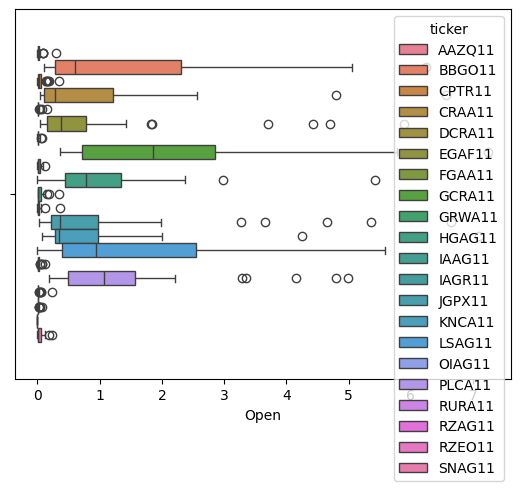

In [123]:
sns.boxplot(x=graph_data_ticker['Open'],hue=graph_data_ticker['ticker'])

In [124]:
tickers = data_ticker_label['ticker'].unique()
tickers

array(['AAZQ11', 'BBGO11', 'CPTR11', 'CRAA11', 'DCRA11', 'EGAF11',
       'FGAA11', 'GCRA11', 'GRWA11', 'HGAG11', 'IAAG11', 'IAGR11',
       'JGPX11', 'KNCA11', 'KOPA11', 'LSAG11', 'OIAG11', 'PLCA11',
       'RURA11', 'RZAG11', 'RZEO11', 'SNAG11'], dtype=object)

In [125]:
# Baixar os dados do índice
indice = yf.download(tickers=['XFIX11.SA'], multi_level_index=False)
# indice.columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
indice = indice.drop(columns=['Close', 'Volume', 'Low', 'High'])
indice.columns = ['index']
# Criar o dataframe beta
print(indice.columns)
variance_index = indice['index'].var()
beta = pd.DataFrame()
drawdown = pd.DataFrame()
# Iterar sobre os tickers
for ticker in tickers:
    # Baixar os dados do ticker
    print(ticker)
    ticker_data = yf.download(tickers=[ticker+'.SA'], multi_level_index=False)
    # usando ticker_data calcule drawdown
    low = ticker_data['Low'].reset_index()
    low['Date'] = low['Date'].dt.to_period('M')
    low = low.groupby(low['Date']).min()
    high = ticker_data['High'].reset_index()
    high['Date'] = high['Date'].dt.to_period('M')
    high = high.groupby(high['Date']).max()
    drawdown_in_loop = (high['High'] - low['Low']) / high['High']
    drawdown_in_loop = drawdown_in_loop.reset_index()
    drawdown_in_loop['ticker'] = ticker
    drawdown = pd.concat([drawdown, drawdown_in_loop], ignore_index=True)
    # Resetar o índice para garantir que as datas sejam alinhadas corretamente
    ticker_data = ticker_data.drop(columns=['Close', 'Volume', 'Low', 'High'])
    ticker_data.columns = ['ticker']
    merge_index_ticker = pd.merge(indice, ticker_data, on='Date', how='inner')
    cov = merge_index_ticker['ticker'].cov(merge_index_ticker['index'])
    print(f"Covariância entre {ticker} e o índice: {cov}")
    beta_calculated = cov / variance_index
    print(f"Beta de {ticker}: {beta_calculated}")
    beta = pd.concat([pd.DataFrame({'ticker': [ticker], 'Beta': [beta_calculated]}), beta], ignore_index=True)
    # # Mesclar os dados do índice e do ticker para alinhamento
    # merged_data = pd.merge(indice[['Date', 'Open']], ticker_data[['Date', 'Open']], on='Date', suffixes=('_indice', '_ticker'))
    
    # # Calcular a covariância acumulada até cada mês
    # merged_data['Month'] = merged_data['Date'].dt.to_period('M')
    # for month in merged_data['Month'].unique():
    #     monthly_data = merged_data[merged_data['Month'] <= month]
    #     covariance = monthly_data['Open_ticker'].cov(monthly_data['Open_indice'])
    #     beta = beta.append({'Ticker': ticker, 'Month': month, 'Covariance': covariance}, ignore_index=True)

# Exibir o dataframe beta
beta

[*********************100%***********************]  1 of 1 completed


Index(['index'], dtype='object')
AAZQ11


[*********************100%***********************]  1 of 1 completed


Covariância entre AAZQ11 e o índice: 0.11230555005196068
Beta de AAZQ11: 0.15258062985772627
BBGO11


[*********************100%***********************]  1 of 1 completed


Covariância entre BBGO11 e o índice: 5.098980812363239
Beta de BBGO11: 6.927580191921789
CPTR11


[*********************100%***********************]  1 of 1 completed


Covariância entre CPTR11 e o índice: 1.7524235006155098
Beta de CPTR11: 2.380878606424028
CRAA11


[*********************100%***********************]  1 of 1 completed


Covariância entre CRAA11 e o índice: 2.432903781568108
Beta de CRAA11: 3.305393110163795
DCRA11


[*********************100%***********************]  1 of 1 completed


Covariância entre DCRA11 e o índice: 0.3370675326710745
Beta de DCRA11: 0.4579468816612095
EGAF11


[*********************100%***********************]  1 of 1 completed


Covariância entre EGAF11 e o índice: 5.98598083042416
Beta de EGAF11: 8.132676657563357
FGAA11


[*********************100%***********************]  1 of 1 completed


Covariância entre FGAA11 e o índice: 0.1336297435166077
Beta de FGAA11: 0.1815521176295993
GCRA11


[*********************100%***********************]  1 of 1 completed


Covariância entre GCRA11 e o índice: 2.136422845031091
Beta de GCRA11: 2.902588012671315
GRWA11


[*********************100%***********************]  1 of 1 completed


Covariância entre GRWA11 e o índice: 0.3577157026565318
Beta de GRWA11: 0.4859999100318717
HGAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre HGAG11 e o índice: -6.206607020441794
Beta de HGAG11: -8.432423936486133
IAAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre IAAG11 e o índice: 0.15627716888991078
Beta de IAAG11: 0.21232137548476002
IAGR11


[*********************100%***********************]  1 of 1 completed


Covariância entre IAGR11 e o índice: -0.13389786844200274
Beta de IAGR11: -0.1819163976672146
JGPX11


[*********************100%***********************]  1 of 1 completed


Covariância entre JGPX11 e o índice: 3.1717447657733318
Beta de JGPX11: 4.309197665527061
KNCA11


[*********************100%***********************]  1 of 1 completed


Covariância entre KNCA11 e o índice: 5.499351321435777
Beta de KNCA11: 7.4715317991440715
KOPA11


[*********************100%***********************]  1 of 1 completed


Covariância entre KOPA11 e o índice: 9.059726023064096
Beta de KOPA11: 12.30873008767584
LSAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre LSAG11 e o índice: 0.7984500094221255
Beta de LSAG11: 1.0847906028791003
OIAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre OIAG11 e o índice: 0.11750587787075165
Beta de OIAG11: 0.1596459021767761
PLCA11


[*********************100%***********************]  1 of 1 completed


Covariância entre PLCA11 e o índice: 0.7990020718537225
Beta de PLCA11: 1.0855406462518
RURA11


[*********************100%***********************]  1 of 1 completed


Covariância entre RURA11 e o índice: 0.4134885653709438
Beta de RURA11: 0.5617740682813634
RZAG11


[*********************100%***********************]  1 of 1 completed


Covariância entre RZAG11 e o índice: 0.4606081366042305
Beta de RZAG11: 0.6257916867701602
RZEO11


[*********************100%***********************]  1 of 1 completed


Covariância entre RZEO11 e o índice: 0.047520598596514745
Beta de RZEO11: 0.06456246251158286
SNAG11


[*********************100%***********************]  1 of 1 completed

Covariância entre SNAG11 e o índice: 1.4921349216221194
Beta de SNAG11: 2.027245190184056


,ticker,Beta
0,SNAG11,2.027245
1,RZEO11,0.064562
2,RZAG11,0.625792
3,RURA11,0.561774
4,PLCA11,1.085541
5,OIAG11,0.159646
6,LSAG11,1.084791
7,KOPA11,12.308730
8,KNCA11,7.471532
9,JGPX11,4.309198


In [126]:
beta.loc[beta['Beta'] < 0].sort_values(by='Beta', ascending=False)

,ticker,Beta
10,IAGR11,-0.181916
12,HGAG11,-8.432424


In [127]:
beta.loc[(beta['Beta'] > 0) & (beta['Beta']<1)].sort_values(by='Beta', ascending=False)

,ticker,Beta
2,RZAG11,0.625792
3,RURA11,0.561774
13,GRWA11,0.486000
17,DCRA11,0.457947
11,IAAG11,0.212321
15,FGAA11,0.181552
5,OIAG11,0.159646
21,AAZQ11,0.152581
1,RZEO11,0.064562


In [128]:
beta.loc[beta['Beta']>1].sort_values(by='Beta', ascending=False)

,ticker,Beta
7,KOPA11,12.308730
16,EGAF11,8.132677
8,KNCA11,7.471532
20,BBGO11,6.927580
9,JGPX11,4.309198
18,CRAA11,3.305393
14,GCRA11,2.902588
19,CPTR11,2.380879
0,SNAG11,2.027245
4,PLCA11,1.085541


In [129]:
drawdown.columns = ['Date','drawdown','ticker']
drawdown

,Date,drawdown,ticker
0,2022-12,0.078431,AAZQ11
1,2023-01,0.097000,AAZQ11
2,2023-02,0.102218,AAZQ11
3,2023-03,0.042424,AAZQ11
4,2023-04,0.049281,AAZQ11
...,...,...,...
703,2025-01,0.061458,SNAG11
704,2025-02,0.034085,SNAG11
705,2025-03,0.025779,SNAG11
706,2025-04,0.066008,SNAG11


In [130]:
index = yf.download('XFIX11.SA',multi_level_index=False,).reset_index()
index['Date'] = index['Date'].dt.to_period('M')
index_variance = index.groupby(by='Date').var()
index_variance = index_variance.drop(columns=['Close','High','Low','Volume']).reset_index()
index_variance

[*********************100%***********************]  1 of 1 completed


,Date,Open
0,2021-01,0.000541
1,2021-02,0.001153
2,2021-03,0.008575
3,2021-04,0.001075
4,2021-05,0.000501
5,2021-06,0.023019
6,2021-07,0.014736
7,2021-08,0.020445
8,2021-09,0.006156
9,2021-10,0.018042


In [131]:
marge_index = pd.merge(beta,data_ticker_label,on=['ticker'],how='right')
marge_index

,ticker,Beta,Date,Open
0,AAZQ11,0.152581,2022-12,0.011244
1,AAZQ11,0.152581,2023-01,0.014352
2,AAZQ11,0.152581,2023-02,0.003305
3,AAZQ11,0.152581,2023-03,0.001440
4,AAZQ11,0.152581,2023-04,0.006627
...,...,...,...,...
703,SNAG11,2.027245,2025-01,0.014899
704,SNAG11,2.027245,2025-02,0.007978
705,SNAG11,2.027245,2025-03,0.002596
706,SNAG11,2.027245,2025-04,0.020555


In [132]:
marge_index.dropna()

,ticker,Beta,Date,Open
0,AAZQ11,0.152581,2022-12,0.011244
1,AAZQ11,0.152581,2023-01,0.014352
2,AAZQ11,0.152581,2023-02,0.003305
3,AAZQ11,0.152581,2023-03,0.001440
4,AAZQ11,0.152581,2023-04,0.006627
...,...,...,...,...
702,SNAG11,2.027245,2024-12,0.081189
703,SNAG11,2.027245,2025-01,0.014899
704,SNAG11,2.027245,2025-02,0.007978
705,SNAG11,2.027245,2025-03,0.002596


In [133]:
marge_index = pd.merge(marge_index,drawdown,on=['ticker','Date'],how='right')
marge_index['Label'] = (marge_index['Beta'] + marge_index['Open'] + marge_index['drawdown']) / 3
marge_index.dropna(inplace=True)
marge_index

,ticker,Beta,Date,Open,drawdown,Label
0,AAZQ11,0.152581,2022-12,0.011244,0.078431,0.080752
1,AAZQ11,0.152581,2023-01,0.014352,0.097000,0.087978
2,AAZQ11,0.152581,2023-02,0.003305,0.102218,0.086034
3,AAZQ11,0.152581,2023-03,0.001440,0.042424,0.065482
4,AAZQ11,0.152581,2023-04,0.006627,0.049281,0.069496
...,...,...,...,...,...,...
702,SNAG11,2.027245,2024-12,0.081189,0.137681,0.748705
703,SNAG11,2.027245,2025-01,0.014899,0.061458,0.701201
704,SNAG11,2.027245,2025-02,0.007978,0.034085,0.689769
705,SNAG11,2.027245,2025-03,0.002596,0.025779,0.685207


In [134]:
marge_index.loc[marge_index['Label'] < 0]

,ticker,Beta,Date,Open,drawdown,Label
287,HGAG11,-8.432424,2022-08,0.005148,0.002896,-2.808127
288,HGAG11,-8.432424,2022-09,1.238355,0.101449,-2.364207
289,HGAG11,-8.432424,2022-10,0.001219,0.005792,-2.808471
290,HGAG11,-8.432424,2022-11,2.370427,0.131106,-1.976963
291,HGAG11,-8.432424,2022-12,5.425698,0.093684,-0.971014
293,HGAG11,-8.432424,2023-02,2.977278,0.222963,-1.744061
295,HGAG11,-8.432424,2023-04,1.477702,0.227273,-2.242483
296,HGAG11,-8.432424,2023-05,2.372179,0.178810,-1.960478
297,HGAG11,-8.432424,2023-06,0.659749,0.180931,-2.530581
298,HGAG11,-8.432424,2023-07,1.439034,0.230697,-2.254231


In [135]:
marge_index.describe()

,Beta,Open,drawdown,Label
count,683.000000,683.000000,683.000000,683.000000
mean,2.119999,34.244297,0.082821,12.149039
std,3.851846,496.248451,0.069059,165.468165
min,-8.432424,0.000000,0.000000,-2.808471
25%,0.212321,0.007210,0.039849,0.159336
50%,1.084791,0.076493,0.061572,0.575488
75%,4.309198,0.659866,0.105779,1.900779
max,12.308730,12317.899726,0.753073,4106.197706


In [136]:
marge_index.loc[marge_index['Label'].isna()]

,ticker,Beta,Date,Open,drawdown,Label


<Axes: xlabel='Label', ylabel='Count'>

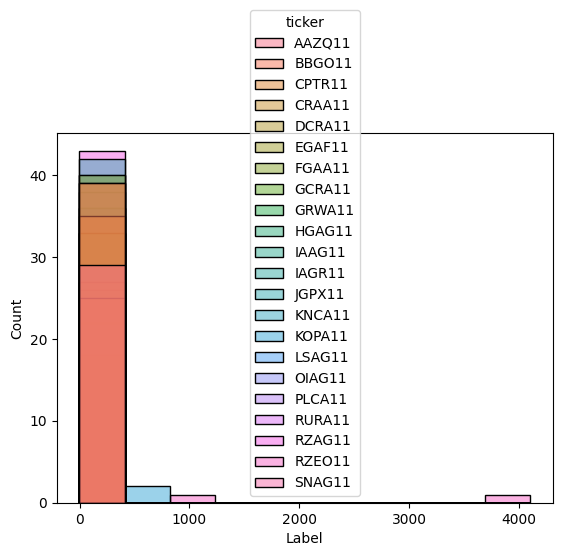

In [137]:
sns.histplot(x=marge_index['Label'],bins=10, hue=marge_index['ticker'])

In [138]:
cut_label = pd.qcut(marge_index['Label'],2)

<Axes: xlabel='Label'>

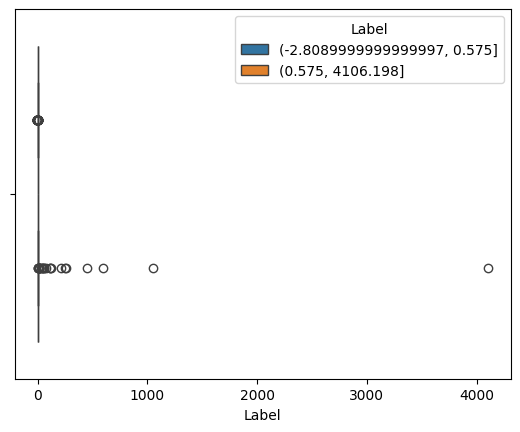

In [139]:
sns.boxplot(x=marge_index['Label'], hue=cut_label)

In [140]:
marge_index['Beta'].describe()

count    683.000000
mean       2.119999
std        3.851846
min       -8.432424
25%        0.212321
50%        1.084791
75%        4.309198
max       12.308730
Name: Beta, dtype: float64

In [141]:
marge_index.columns

Index(['ticker', 'Beta', 'Date', 'Open', 'drawdown', 'Label'], dtype='object')

In [142]:
rotulo = marge_index.drop(columns=['drawdown','Open','Beta'])

### Dados de Mudanças de preços

### Dados mensais

In [143]:
mensal = pd.read_csv('./../assets/mes_data.csv')

# mensal['Data da Informação sobre detalhamento do número de cotistas¹']
mensal['Data'] = pd.to_datetime(mensal['Data da Informação sobre detalhamento do número de cotistas¹'],dayfirst=True,errors='coerce')
mensal.drop(columns=['Data da Informação sobre detalhamento do número de cotistas¹'])

,Unnamed: 0,ticker,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30.136,30.080,46.0,0.0,0.0,4.0,5.0,0.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30,2024.0-3.0
1,1,AAZQ,29.754,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30,2024.0-3.0
2,2,AAZQ,29.430,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31,2024.0-3.0
3,3,AAZQ,27.954,27.899,48.0,0.0,0.0,0.0,6.0,0.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28,2024.0-2.0
4,4,AAZQ,28.223,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31,2024.0-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,8.496,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29,2022.0-2.0
889,889,XPCA,6.546,6.498,47.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31,2022.0-1.0
890,890,XPCA,5.386,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25,2022.0-1.0
891,891,XPCA,4.546,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31,2022.0-1.0


# Fazer o rôtulo
Variação
Beta = Varição do ativo / Variação do indice
Rótulo = Beta * Variação * Resultado do próximo quarter(trimestre)

In [144]:
mensal['Ano_Quarter'] = mensal['Data'].dt.strftime('%Y') + '-' + mensal['Data'].dt.quarter.astype(str)
mensal['Ano_Quarter'] = mensal['Ano_Quarter'].str[:-2]
mensal['Ano_Quarter']


0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

### Remover colunas Unnamed de mensal e trmestral

In [145]:
mensal[mensal.isna()] = 0
mensal

C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\3613130871.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  mensal[mensal.isna()] = 0


,Unnamed: 0,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Total dos Passivos,Valor total dos imóveis objeto de ônus reais,Valor total das garantias prestadas com operacões da classe,"Valor total das garantias prestadas com operações de cotistas (art. 32, § 3º, Anexo normativo III)",Cédulas de Debêntures,Total do passivo,Certificado de Recebíveis Imobiliários (CRI),Letras de Crédito Imobiliário (LCI),Data,Ano_Quarter
0,0,AAZQ,30/09/2024,30.136,30.080,46.0,0.0,0.0,4.0,5.0,...,"2.527.467,07","0,00","0,00","0,00",0,0,0,0,2024-09-30 00:00:00,2024-3
1,1,AAZQ,30/08/2024,29.754,0.000,0.0,0.0,0.0,0.0,0.0,...,"2.533.303,79","0,00","0,00","0,00",0,0,0,0,2024-08-30 00:00:00,2024-3
2,2,AAZQ,31/07/2024,29.430,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.538.706,75",0,0,2024-07-31 00:00:00,2024-3
3,3,AAZQ,28/06/2024,27.954,27.899,48.0,0.0,0.0,0.0,6.0,...,0,0,0,0,"0,00","2.865.231,42",0,0,2024-06-28 00:00:00,2024-2
4,4,AAZQ,31/05/2024,28.223,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.927.667,16",0,0,2024-05-31 00:00:00,2024-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,888,XPCA,29/04/2022,8.496,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","2.177.102,20","0,00","0,00",2022-04-29 00:00:00,2022-2
889,889,XPCA,31/03/2022,6.546,6.498,47.0,0.0,0.0,0.0,1.0,...,0,0,0,0,"0,00","2.139.190,07","0,00","0,00",2022-03-31 00:00:00,2022-1
890,890,XPCA,25/02/2022,5.386,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.705.675,01","4.366.443,47","0,00",2022-02-25 00:00:00,2022-1
891,891,XPCA,31/01/2022,4.546,0.000,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,"0,00","1.524.411,38","7.057.364,03","0,00",2022-01-31 00:00:00,2022-1


In [146]:
mensal['Dividend Yield do Mês de Referência³ (%)']

0      1.0926
1      1.0933
2      1.0945
3      1.1660
4      1.1655
        ...  
888    1.4666
889    1.4620
890    1.1514
891    1.0461
892    0.8371
Name: Dividend Yield do Mês de Referência³ (%), Length: 893, dtype: float64

In [147]:
# mensal.to_csv('../assets/mes_data.csv')
# for column in mensal.columns.tolist():
#     print(colum)
#     if colum not in ['Mount','Dividend Yield do Mês de Referência³ (%)']:
#         print(colum)
#         mensal[colum] = mensal[colum].astype(str).replace(".","").replace(',','.')
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [148]:
trimestre = pd.read_csv('../assets/dados1.csv')
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,8.653422e+09,-5.747045e+08,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.730684e+10,-1.730684e+09,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,8.653422e+10,-8.653422e+08,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.922983e+11,-1.922983e+08,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,7.430380e+09,-7.430380e+08,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [149]:
for i in trimestre.columns:
    print(i)

Unnamed: 0
NomedoFundo:
CNPJdoFundo:
DatadeFuncionamento:
PúblicoAlvo:
CódigoISIN:
Quantidadedecotasemitidas:
FundoExclusivo?
Cotistaspossuemvínculofamiliarousocietáriofamiliar?
Classificaçãoautorregulação:
PrazodeDuração:
DatadoPrazodeDuração:
Encerramentodoexercíciosocial:
Mercadodenegociaçãodascotas:
Entidadeadministradorademercadoorganizado:
NomedoAdministrador:
CNPJdoAdministrador:
Endereço:
Telefones:
Site:
E-mail:
Competência:
DatadeEncerramentodoTrimestre:
OFundoseenquadranadefiniçãodanota"6":
Resultadocontábil/financeirotrimestrallíquido_financeiro
Resultadocontábil/financeirotrimestrallíquido_contabil
(-)Taxadeadministração_financeiro
(-)Taxadeadministração_contabil
(-)Taxadedesempenho(performance)_financeiro
(-)Taxadedesempenho(performance)_contabil
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_financeiro
(-)Consultoriaespecializadadequetrataoart.31,II,ICVM472_contabil
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro
(-)Empresaespecializadadequetrata

In [150]:
# trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
# trimestre['DatadeFuncionamento:'] = pd.to_datetime(trimestre['DatadeFuncionamento:'])
# trimestre.to_csv('../assets/dados1.csv')


In [151]:
str(trimestre['NomedoFundo:'].unique().tolist())

"['AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO', 'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO', 'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO', 'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO', 'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO', '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB', 'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO', 'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO', 'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO', 'INTERAMERRA-FIA

In [152]:
dict_nome_ticker= {
    'AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'AAZQ', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISEXESARAGUAIA-FIAGRO-IMOBILIÁRIO': 'AGRX', 
    'BBFUNDODEINVESTIMENTODECRÉDITOFIAGRO-IMOBILIÁRIO': 'BBGO', 
    'CAPITANIAAGROSTRATEGIES-FIAGRO-IMOBILIÁRIO': 'CPTR', 
    'SPARTAFIAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'CRAA', 
    'DEVANTFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'DCRA', 
    'ECOAGROIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'EGAF', 
    'FG/AGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'FGAA', 
    '051AGROFAZENDASIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIARIO': 'FLEM', 
    '051AGROFAZENDASIIIFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOB': 'FZDA', 
    'GALAPAGOSRECEBÍVEISDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'GCRA', 
    'GREENWICHAGROFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'GRWA', 
    'HIGHFUNDODEINVESTIMENTOAGRO-FIAGRO-IMOBILIÁRIO': 'HGAG', 
    'INTERAMERRA-FIAGRO-IMOBILIÁRIO': 'IAAG', 
    'SFIINVESTIMENTOSDOAGRONEGÓCIO-FIAGRO-IMOBILIÁRIO': 'IAGR', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISJGPCRÉDITO-FIAGRO-IMOBILIÁRIO': 'JGPX', 
    'KINEACRÉDITOAGROFIAGRO-IMOBILIÁRIO': 'KNCA', 
    'KINEAOPORTUNIDADESAGROIFIAGRO-IMOBILIÁRIO': 'KOPA', 
    'LESTEFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'KOPA', 
    'NCHRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'NCHEQIRECEBÍVEISDOAGRONEGÓCIO-FIAGROIMOBILIÁRIO': 'NCRA', 
    'OURINVESTINNOVATION-FIAGROIMOBILIÁRIO': 'OIAG', 
    'PLURALBRBCRÉDITOAGRO-FIAGRO-IMOBILIÁRIO': 'PLCA', 
    'ITAÚASSETRURALFIAGRO-IMOBILIÁRIO': 'RURA', 
    'FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISRIZAAGRO-FIAGRO-IMOBILIÁRIO': 'RZAG', 
    'RIZAEOSFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISFIAGROIMOBILIÁRIO': 'RZEO', 
    'SUNOAGRO-FIAGRO-IMOBILIÁRIO': 'SNAG', 
    'VECTISDATAGROCRÉDITOAGRONEGÓCIO-FINASCADEIASPRODUTIVASAGROINDUSTRIAIS-IMOBILIÁRIO': 'VCRA', 
    'VALORACRAFUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAIS-FIAGRO-IMOBILIÁRIO': 'VGIA', 
    'XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIASPRODUTIVASAGROINDUSTRIAISIMOB.-FIAGRO-IMOB.': 'XPCA'
}

In [153]:
trimestre['ticker'] = trimestre['NomedoFundo:'].apply(lambda x: dict_nome_ticker.get(x))
trimestre['ticker'] 

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
307    XPCA
308    XPCA
309    XPCA
310    XPCA
311    XPCA
Name: ticker, Length: 312, dtype: object

In [154]:
mensal.ticker

0      AAZQ
1      AAZQ
2      AAZQ
3      AAZQ
4      AAZQ
       ... 
888    XPCA
889    XPCA
890    XPCA
891    XPCA
892    XPCA
Name: ticker, Length: 893, dtype: object

In [155]:
trimestre['DatadeEncerramentodoTrimestre:'] = pd.to_datetime(trimestre['DatadeEncerramentodoTrimestre:'])
trimestre['Ano_Quarter'] = trimestre['DatadeEncerramentodoTrimestre:'].dt.year.astype(str) + "-" + trimestre['DatadeEncerramentodoTrimestre:'].dt.quarter.astype(str) 
# mensal['Ano_Quarter']
trimestre

,Unnamed: 0,NomedoFundo:,CNPJdoFundo:,DatadeFuncionamento:,PúblicoAlvo:,CódigoISIN:,Quantidadedecotasemitidas:,FundoExclusivo?,Cotistaspossuemvínculofamiliarousocietáriofamiliar?,Classificaçãoautorregulação:,...,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN,ticker,Ano_Quarter
0,0,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0,AAZQ,2024-2
1,1,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidorProfissional,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,2.906377e+09,1077649.0,8.029909e+08,7.628413e+09,0.0,0.0,0.0,0.0,AAZQ,2024-1
2,2,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,2.000000e+00,965479.0,1.792566e+09,1.702938e+10,0.0,0.0,0.0,0.0,AAZQ,2023-4
3,3,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,3.500000e+01,1177336.0,7.350000e+08,6.982500e+10,0.0,0.0,0.0,0.0,AAZQ,2023-3
4,4,AZQUESTSOLEFUNDODEINVESTIMENTONASCADEIASPRODUT...,44.625.826/0001-11,2022-08-22,InvestidoresemGeral,BRAAZQCTF001,"24.037.284,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,3.500000e+01,992625.0,1.937271e+09,1.840408e+11,0.0,0.0,0.0,0.0,AAZQ,2023-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,307,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"21.475.895,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,4.000000e+00,1111614.0,6.684318e+08,6.350102e+09,0.0,0.0,0.0,0.0,XPCA,2022-3
308,308,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"15.885.723,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,0.0,0.0,XPCA,2022-2
309,309,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1
310,310,XPCRÉDITOAGRÍCOLA-FUNDODEINVESTIMENTONASCADEIA...,41.269.527/0001-01,2021-11-04,InvestidoresemGeral,BRXPCACTF004,"14.092.466,00",Não,Não,Mandato:TítuloseValoresMobiliários\r\nSegmento...,...,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0,XPCA,2022-1


In [156]:
trimestre['Ano_Quarter']

0      2024-2
1      2024-1
2      2023-4
3      2023-3
4      2023-2
        ...  
307    2022-3
308    2022-2
309    2022-1
310    2022-1
311    2021-4
Name: Ano_Quarter, Length: 312, dtype: object

In [157]:
mensal['Ano_Quarter']

0      2024-3
1      2024-3
2      2024-3
3      2024-2
4      2024-2
        ...  
888    2022-2
889    2022-1
890    2022-1
891    2022-1
892    2021-4
Name: Ano_Quarter, Length: 893, dtype: object

In [158]:
mensal.columns.tolist()

['Unnamed: 0',
 'ticker',
 'Data da Informação sobre detalhamento do número de cotistas¹',
 'Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [159]:
def convert_to_numeric(df: pd.DataFrame, columns: list) -> pd.DataFrame:
    for column in columns:
        try:
            df[column] = df[column].astype(str)
            df[column] = df[column].str.replace("%", "")
            df[column] = df[column].str.replace(".", "")
            df[column] = df[column].str.replace(",", ".")
            df[column] = pd.to_numeric(df[column], errors='raise')
            print(f"Converted column {column} to numeric.")
        except Exception as e:
            print(f"Error converting column {column}: {e}")
    return df

In [160]:
mensal = convert_to_numeric(mensal, mensal.columns.tolist())

Converted column Unnamed: 0 to numeric.
Error converting column ticker: Unable to parse string "AAZQ" at position 0
Error converting column Data da Informação sobre detalhamento do número de cotistas¹: Unable to parse string "30/09/2024" at position 0
Converted column Número de cotistas to numeric.
Converted column Pessoa física to numeric.
Converted column Pessoa jurídica não financeira to numeric.
Converted column Banco comercial to numeric.
Converted column Corretora ou distribuidora to numeric.
Converted column Outras pessoas jurídicas financeiras to numeric.
Converted column Investidores não residentes to numeric.
Converted column Entidade aberta de previdência complementar to numeric.
Converted column Entidade fechada de previdência complementar to numeric.
Converted column Regime próprio de previdência dos servidores públicos to numeric.
Converted column Sociedade seguradora ou resseguradora to numeric.
Converted column Sociedade de capitalização e de arrendamento mercantil to n

In [161]:
mensal.dtypes

Unnamed: 0                                                        int64
ticker                                                           object
Data da Informação sobre detalhamento do número de cotistas¹     object
Número de cotistas                                                int64
Pessoa física                                                     int64
                                                                 ...   
Total do passivo                                                float64
Certificado de Recebíveis Imobiliários (CRI)                    float64
Letras de Crédito Imobiliário (LCI)                             float64
Data                                                             object
Ano_Quarter                                                      object
Length: 88, dtype: object

In [162]:
final = pd.merge(mensal,trimestre,'left',on=['Ano_Quarter','ticker'])
final

,Unnamed: 0_x,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,0,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),NaN
0,0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
4,4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,890,XPCA,25/02/2022,5386,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1067,890,XPCA,25/02/2022,5386,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1068,891,XPCA,31/01/2022,4546,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0
1069,891,XPCA,31/01/2022,4546,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,0.0,0.0


In [163]:
final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')
final['Date'] = final_date.dt.to_period('M')
final['Date']

C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\2064336292.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  final_date = pd.to_datetime(final['Data da Informação sobre detalhamento do número de cotistas¹'],'coerce')


0       2024-09
1       2024-08
2       2024-07
3       2024-06
4       2024-05
         ...   
1066    2022-02
1067    2022-02
1068    2022-01
1069    2022-01
1070    2021-12
Name: Date, Length: 1071, dtype: period[M]

In [164]:
columns_to_drop = list(filter(lambda column: 'Unnamed' in column,final.columns))
columns_to_drop.append('NaN')
columns_to_drop.append('0')
final = final.drop(columns=columns_to_drop)
final


,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [165]:
final.drop_duplicates(subset=['ticker','Date'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8496,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6546,6498,470,0,0,0,10,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [166]:
final.to_csv('../assets/final.csv')

In [167]:
final.shape

(1071, 204)

In [168]:
final[final.isna()] = 0

C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0
C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\3945899940.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with period[M], please explicitly cast to a compatible dtype first.
  final[final.isna()] = 0


In [169]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1067,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01
1069,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


In [170]:
final.drop_duplicates(subset=['ticker','Data da Informação sobre detalhamento do número de cotistas¹'])

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date
0,AAZQ,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09
1,AAZQ,30/08/2024,29754,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08
2,AAZQ,31/07/2024,2943,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07
3,AAZQ,28/06/2024,27954,27899,480,0,0,0,60,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06
4,AAZQ,31/05/2024,28223,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA,29/04/2022,8496,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04
1064,XPCA,31/03/2022,6546,6498,470,0,0,0,10,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03
1066,XPCA,25/02/2022,5386,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02
1068,XPCA,31/01/2022,4546,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01


Juntar final com label

In [171]:
final.columns 

Index(['ticker',
       'Data da Informação sobre detalhamento do número de cotistas¹',
       'Número de cotistas', 'Pessoa física', 'Pessoa jurídica não financeira',
       'Banco comercial', 'Corretora ou distribuidora',
       'Outras pessoas jurídicas financeiras', 'Investidores não residentes',
       'Entidade aberta de previdência complementar',
       ...
       ' (+) Resultado financeiro que excede o mínimo de 95%⁷.',
       ' Rendimentos declarados',
       ' (-) Rendimentos pagos antecipadamente durante o trimestre/semestre',
       ' Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre',
       ' % do resultado financeiro líquido declarado no trimestre/semestre',
       ' Resultado financeiro líquido acumulado no trimestre/semestre corrente',
       ' 95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)',
       ' (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.',
       ' (-) Parce

In [172]:
final['ticker'] = final['ticker'] + '11'

In [173]:
len(rotulo['ticker'].unique())

22

In [174]:
rotulo

,ticker,Date,Label
0,AAZQ11,2022-12,0.080752
1,AAZQ11,2023-01,0.087978
2,AAZQ11,2023-02,0.086034
3,AAZQ11,2023-03,0.065482
4,AAZQ11,2023-04,0.069496
...,...,...,...
702,SNAG11,2024-12,0.748705
703,SNAG11,2025-01,0.701201
704,SNAG11,2025-02,0.689769
705,SNAG11,2025-03,0.685207


In [175]:
final['ticker'] , rotulo['ticker']

(0       AAZQ11
 1       AAZQ11
 2       AAZQ11
 3       AAZQ11
 4       AAZQ11
          ...  
 1066    XPCA11
 1067    XPCA11
 1068    XPCA11
 1069    XPCA11
 1070    XPCA11
 Name: ticker, Length: 1071, dtype: object,
 0      AAZQ11
 1      AAZQ11
 2      AAZQ11
 3      AAZQ11
 4      AAZQ11
         ...  
 702    SNAG11
 703    SNAG11
 704    SNAG11
 705    SNAG11
 706    SNAG11
 Name: ticker, Length: 683, dtype: object)

In [176]:
final['Date'] = final['Date'].astype(str)
rotulo['Date'] = rotulo['Date'].astype(str)

final = pd.merge(final, rotulo, 'left', on=['Date', 'ticker'])
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100240
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.078531
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124046
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.228735
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1067,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN
1069,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [177]:
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100240
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.078531
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124046
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.228735
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1067,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN
1069,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [178]:
final['Label'].unique()

array([ 1.00240064e-01,  7.85311377e-02,  1.24045717e-01,  2.28735453e-01,
        8.19735358e-02,  5.96046778e-02,  6.40859948e-02,  6.38266957e-02,
        7.27241431e-02,  8.11125132e-02,  6.24074956e-02,  6.47890144e-02,
        6.39730426e-02,  6.28520606e-02,  7.16257985e-02,  6.59606494e-02,
        6.47805636e-02,  6.94963436e-02,  6.54816254e-02,  8.60344698e-02,
        8.79775286e-02,  8.07519359e-02,             nan,  4.02502940e+00,
        2.85326464e+00,  2.52213315e+00,  2.78858942e+00,  2.38179203e+00,
        2.40619633e+00,  2.41557008e+00,  2.45544656e+00,  2.44337713e+00,
        2.53952305e+00,  2.44175646e+00,  2.66763535e+00,  2.40894870e+00,
        2.46344427e+00,  2.53206610e+00,  2.75316157e+00,  3.11403199e+00,
        2.42521322e+00,  2.35760110e+00,  2.37487531e+00,  2.39533351e+00,
        3.19309244e+00,  2.39392886e+00,  2.35148329e+00,  2.52144428e+00,
        2.47687319e+00,  2.61410611e+00,  2.40069879e+00,  2.50052824e+00,
        2.64376350e+00,  

Removendo duplicacatas

In [179]:
Unnamed_column = filter(lambda column: 'Unnamed' in column, final.columns)
final = final.drop(columns=Unnamed_column)
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100240
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.078531
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124046
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.228735
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1067,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN
1069,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [180]:
final = final.drop_duplicates(subset=['Data da Informação sobre detalhamento do número de cotistas¹','ticker'])
final

,ticker,Data da Informação sobre detalhamento do número de cotistas¹,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,...,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Date,Label
0,AAZQ11,30/09/2024,30136,3008,460,0,0,40,50,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-09,0.100240
1,AAZQ11,30/08/2024,29754,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-08,0.078531
2,AAZQ11,31/07/2024,2943,0,0,0,0,0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,2024-07,0.124046
3,AAZQ11,28/06/2024,27954,27899,480,0,0,0,60,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-06,0.228735
4,AAZQ11,31/05/2024,28223,0,0,0,0,0,0,0,...,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,2024-05,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,XPCA11,29/04/2022,8496,0,0,0,0,0,0,0,...,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,2022-04,NaN
1064,XPCA11,31/03/2022,6546,6498,470,0,0,0,10,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-03,NaN
1066,XPCA11,25/02/2022,5386,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-02,NaN
1068,XPCA11,31/01/2022,4546,0,0,0,0,0,0,0,...,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,2022-01,NaN


In [181]:
for i,type in final.dtypes.items():
    print(i,type)

ticker object
Data da Informação sobre detalhamento do número de cotistas¹ object
Número de cotistas int64
Pessoa física int64
Pessoa jurídica não financeira int64
Banco comercial int64
Corretora ou distribuidora int64
Outras pessoas jurídicas financeiras int64
Investidores não residentes int64
Entidade aberta de previdência complementar int64
Entidade fechada de previdência complementar int64
Regime próprio de previdência dos servidores públicos int64
Sociedade seguradora ou resseguradora int64
Sociedade de capitalização e de arrendamento mercantil int64
Fundos de investimento imobiliário int64
Outros fundos de investimento int64
Cotistas de distribuidores do fundo (distribuição por conta e ordem) int64
Outros tipos de cotistas não relacionados int64
Ativo – R$ float64
Patrimônio Líquido – R$ float64
Número de Cotas Emitidas float64
Valor Patrimonial das Cotas – R$ float64
Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%) float64
Despesas com o agente cu

Removendo dados categoricos

In [182]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30136,3008,460,0,0,40,50,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.100240
1,29754,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.078531
2,2943,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.124046
3,27954,27899,480,0,0,0,60,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.228735
4,28223,0,0,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,8496,0,0,0,0,0,0,0,0,0,...,172377091.0,1.098535e+11,-1.098535e+09,1.500000e+01,1126815.0,9.749033e+08,9.261581e+10,0.0,0.0,NaN
1064,6546,6498,470,0,0,0,10,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1066,5386,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN
1068,4546,0,0,0,0,0,0,0,0,0,...,52501437.0,4.932363e+10,-4.932363e+07,-2.500000e+01,1063166.0,4.639314e+08,4.407349e+10,0.0,0.0,NaN


In [183]:
size = len(final)
size

796

In [184]:
final['Label'].describe()

count     524.000000
mean       11.494947
std       185.178600
min        -2.808471
25%         0.162964
50%         0.545915
75%         1.618430
max      4106.197706
Name: Label, dtype: float64

In [185]:
def remove_outliers(df, coluna):
    # Calcula os quartis
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    # Define os limites inferior e superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtra os dados que estão dentro dos limites
    df_filtrado = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
    print(f"Removendo {size - len(df_filtrado)} outliers da coluna {coluna}")
    return df_filtrado

final = remove_outliers(final, 'Label')
# print("Dados originais:")
final

Removendo 307 outliers da coluna Label


,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30136,3008,460,0,0,40,50,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.100240
1,29754,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.078531
2,2943,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.124046
3,27954,27899,480,0,0,0,60,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.228735
4,28223,0,0,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,34942,34902,390,0,0,0,0,0,0,0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.737202
931,25673,25632,390,0,0,0,0,0,0,0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.729692
933,23197,23161,340,0,0,0,0,0,0,0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.784615
935,15021,14994,250,0,0,0,0,0,0,0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.697832


In [186]:
final = final.select_dtypes(include=['number'])
final

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,30136,3008,460,0,0,40,50,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.100240
1,29754,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.078531
2,2943,0,0,0,0,0,0,0,0,0,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.124046
3,27954,27899,480,0,0,0,60,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.228735
4,28223,0,0,0,0,0,0,0,0,0,...,59604832.0,1.658573e+10,-1.394162e+09,2.644101e+09,985413.0,1.683124e+09,1.598968e+10,0.0,0.0,0.081974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,34942,34902,390,0,0,0,0,0,0,0,...,14133906.0,1.038000e+11,-6.780000e+06,3.600000e+10,963114.0,1.077754e+09,1.023866e+11,0.0,0.0,0.737202
931,25673,25632,390,0,0,0,0,0,0,0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.729692
933,23197,23161,340,0,0,0,0,0,0,0,...,40680431.0,8.347645e+09,-6.300000e+06,2.047645e+09,998668.0,8.358779e+08,7.940840e+09,0.0,0.0,0.784615
935,15021,14994,250,0,0,0,0,0,0,0,...,0.0,2.603724e+09,-9.000000e+05,1.703724e+09,950000.0,2.740762e+08,2.603724e+09,0.0,0.0,0.697832


<Axes: >

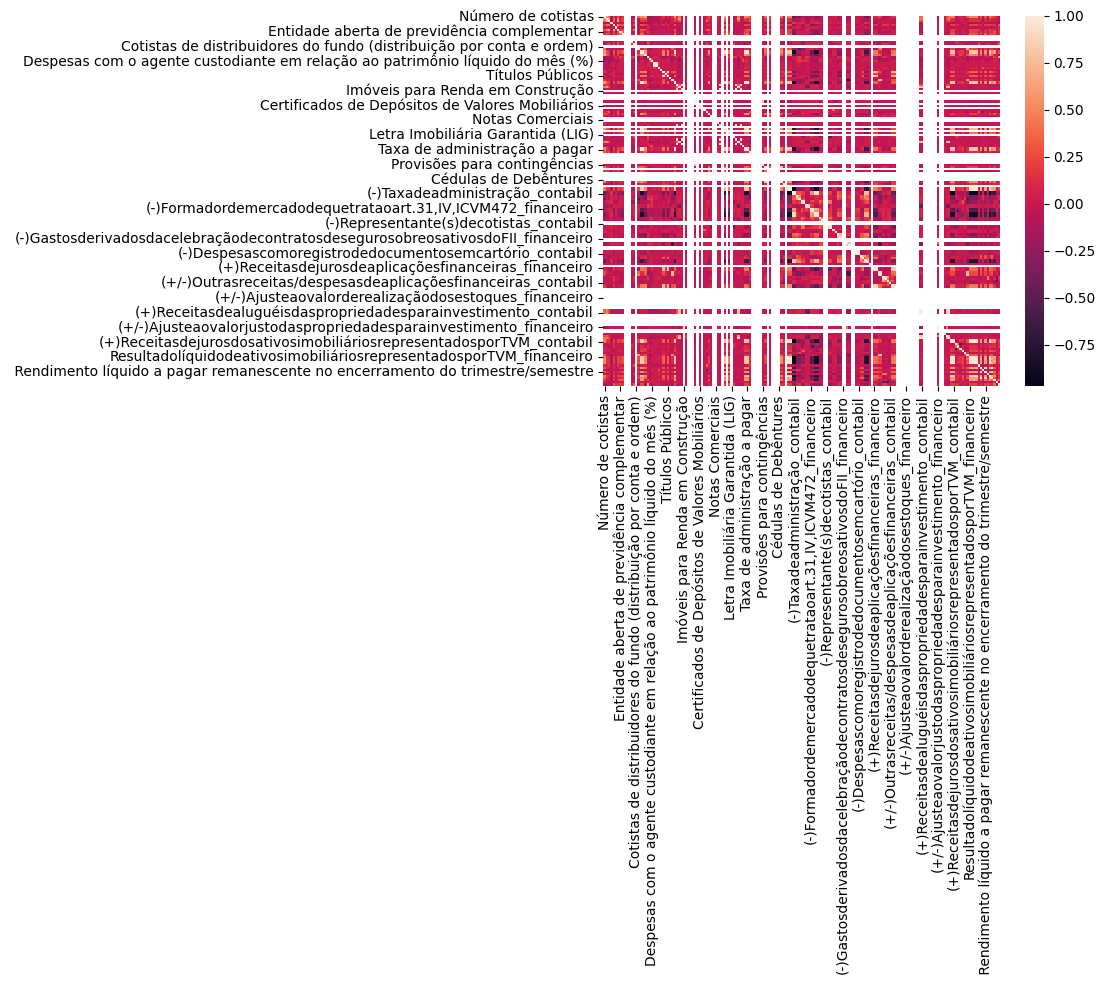

In [187]:
corr = final.corr('pearson')
sns.heatmap(data=corr)

Tentando ver as variaveis que mais interefem no label

In [188]:
corr['Label'].describe()

count    124.000000
mean       0.036714
std        0.182626
min       -0.291008
25%       -0.062933
50%        0.038623
75%        0.142448
max        1.000000
Name: Label, dtype: float64

In [189]:
corr.loc[(corr['Label'] < -0.3) | (corr['Label'] > 0.3)]['Label']

Corretora ou distribuidora                                                                    0.320056
Outros fundos de investimento                                                                 0.316678
Valor Patrimonial das Cotas – R$                                                              0.708184
 (+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.    0.368204
Label                                                                                         1.000000
Name: Label, dtype: float64

In [190]:
corr.loc[(corr['Dividend Yield do Mês de Referência³ (%)'].abs() > 0.3)]['Dividend Yield do Mês de Referência³ (%)']

Dividend Yield do Mês de Referência³ (%)    1.0
Name: Dividend Yield do Mês de Referência³ (%), dtype: float64

In [191]:
corr.loc[(corr[' % do resultado financeiro líquido declarado no trimestre/semestre'].abs() > 0.3)][' % do resultado financeiro líquido declarado no trimestre/semestre']

(+/-)Resultadonavendadeaplicaçõesfinanceiras_financeiro               0.453086
(+/-)Resultadonavendadeaplicaçõesfinanceiras_contabil                 0.448327
 % do resultado financeiro líquido declarado no trimestre/semestre    1.000000
Name:  % do resultado financeiro líquido declarado no trimestre/semestre, dtype: float64

In [192]:
corr.loc[corr['Ativo – R$'].abs() > 0.3]['Ativo – R$']

Número de cotistas                                                                                                                 0.551517
Investidores não residentes                                                                                                        0.305367
Entidade fechada de previdência complementar                                                                                       0.347190
Ativo – R$                                                                                                                         1.000000
Patrimônio Líquido – R$                                                                                                            0.999467
Número de Cotas Emitidas                                                                                                           0.595809
Total mantido para as Necessidades de Liquidez (art. 46, § único, ICVM 472/08)                                                     0.469555
Títulos Públicos    

In [193]:
corr.columns.tolist()

['Número de cotistas',
 'Pessoa física',
 'Pessoa jurídica não financeira',
 'Banco comercial',
 'Corretora ou distribuidora',
 'Outras pessoas jurídicas financeiras',
 'Investidores não residentes',
 'Entidade aberta de previdência complementar',
 'Entidade fechada de previdência complementar',
 'Regime próprio de previdência dos servidores públicos',
 'Sociedade seguradora ou resseguradora',
 'Sociedade de capitalização e de arrendamento mercantil',
 'Fundos de investimento imobiliário',
 'Outros fundos de investimento',
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)',
 'Outros tipos de cotistas não relacionados',
 'Ativo – R$',
 'Patrimônio Líquido – R$',
 'Número de Cotas Emitidas',
 'Valor Patrimonial das Cotas – R$',
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)',
 'Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)',
 'Rentabilidade Efetiva Mensal (%)',
 'Rentabilidade Patrimonial do Mês de R

In [194]:
interval = [final['Label'].min(),final['Label'].quantile(.33),final['Label'].quantile(.66),final['Label'].max()]
labels = ['low_risk','medium_risk','hight_risk']

<Axes: xlabel='Label', ylabel='Count'>

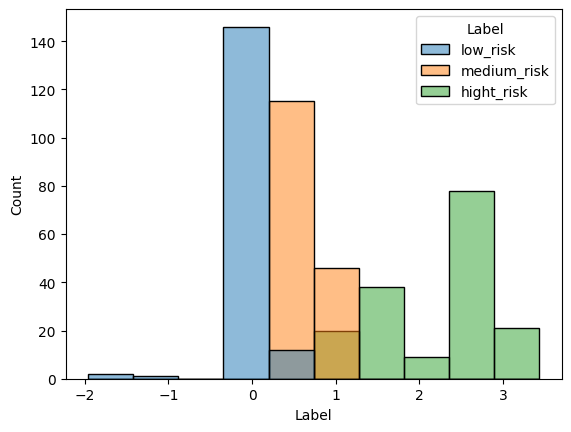

In [195]:
hue = pd.cut(final['Label'],bins=interval,labels=labels)
sns.histplot(x=final['Label'], hue=hue, bins=10)

In [196]:
final['label'] = hue

### RFE

In [197]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

final =final.dropna()
# Carregando um dataset de exemplo
X = final.drop(columns=['label'])
y = final['label']

# Definindo o modelo base (pode ser qualquer estimador com coef_ ou feature_importances_)
modelo = LogisticRegression(max_iter=200)

# Criando o RFE - selecionando 2 features
rfe = RFE(estimator=modelo, n_features_to_select=15)

# Fitando o RFE nos dados
rfe.fit(X, y)

# Verificando as features selecionadas
print("Features selecionadas:", rfe.support_)
print("Ranking das features:", rfe.ranking_)


C:\Users\Kire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

Features selecionadas: [False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False  True False  True  True  True  True  True False
 False False False False False False False False False  True False False
 False False False False False False False  True False False  True False
  True False False False False False False False False False False False
 False False False False False False  True False False False  True False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False False False Fal

C:\Users\Kire\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [198]:
dict_rfe = {}
for i in range(len(rfe.support_)):
    dict_rfe[final.columns[i]] = int(rfe.ranking_[i])
dict_rfe

{'Número de cotistas': 68,
 'Pessoa física': 76,
 'Pessoa jurídica não financeira': 95,
 'Banco comercial': 100,
 'Corretora ou distribuidora': 102,
 'Outras pessoas jurídicas financeiras': 97,
 'Investidores não residentes': 103,
 'Entidade aberta de previdência complementar': 105,
 'Entidade fechada de previdência complementar': 108,
 'Regime próprio de previdência dos servidores públicos': 158,
 'Sociedade seguradora ou resseguradora': 160,
 'Sociedade de capitalização e de arrendamento mercantil': 159,
 'Fundos de investimento imobiliário': 99,
 'Outros fundos de investimento': 98,
 'Cotistas de distribuidores do fundo (distribuição por conta e ordem)': 161,
 'Outros tipos de cotistas não relacionados': 78,
 'Ativo – R$': 3,
 'Patrimônio Líquido – R$': 2,
 'Número de Cotas Emitidas': 1,
 'Valor Patrimonial das Cotas – R$': 96,
 'Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)': 109,
 'Despesas com o agente custodiante em relação ao patrimônio líquid

In [199]:
X = X.loc[:,rfe.support_]

In [200]:
X

,Número de Cotas Emitidas,Títulos Públicos,Fundos de Renda Fixa,Total investido,Direitos reais sobre bens imóveis,Terrenos,Imóveis para Renda Acabados,Fundo de Investimento Imobiliário (FII),"Letras de Crédito Imobiliário ""LCI"" (se FIAGRO, Letras de Crédito do Agronegócio ""LCA"")",Valores a Receber,Contas a Receber por Venda de Imóveis,Total do passivo,Resultadocontábil/financeirotrimestrallíquido_contabil,(+)ReceitasdejurosdosativosimobiliáriosrepresentadosporTVM_contabil,(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro
0,24037284.0,0.0,2676507.92,2.062183e+08,0.00,0.00,0.0,4193529.6,0.0,2117865.49,0.0,0.00,0.00,0.00,0.00
1,24037284.0,0.0,1061445.26,2.083603e+08,0.00,0.00,0.0,4351776.0,0.0,2120925.39,0.0,0.00,0.00,0.00,0.00
2,24037284.0,0.0,12577703.45,1.967102e+08,0.00,0.00,0.0,4272652.8,0.0,2123171.97,0.0,2538706.75,0.00,0.00,0.00
3,24037284.0,0.0,3542933.91,2.058398e+08,0.00,0.00,0.0,4183639.2,0.0,2126523.28,0.0,2865231.42,8801330.80,9493209.97,-13538298.34
4,24037284.0,0.0,5774649.09,2.217847e+08,0.00,0.00,0.0,4282543.2,0.0,2128478.44,0.0,2927667.16,8801330.80,9493209.97,-13538298.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,3000000.0,0.0,4713370.95,3.004466e+08,24584955.90,24584955.90,0.0,0.0,0.0,277502.89,0.0,4524561.32,10777537.83,9584366.98,-326847.87
931,1500000.0,0.0,2577863.00,1.497159e+08,24457508.84,24457508.84,0.0,0.0,0.0,4705.34,0.0,2101142.44,5449316.97,4875559.97,1096861.62
933,1500000.0,0.0,2642039.00,1.495961e+08,24457508.84,14236285.54,0.0,0.0,0.0,5744.69,0.0,337513.38,5449316.97,4875559.97,1096861.62
935,1500000.0,0.0,2667865.00,1.491229e+08,24457508.84,24457508.84,0.0,0.0,0.0,167459.23,0.0,421938.87,2527285.86,2272278.00,-1197049.43


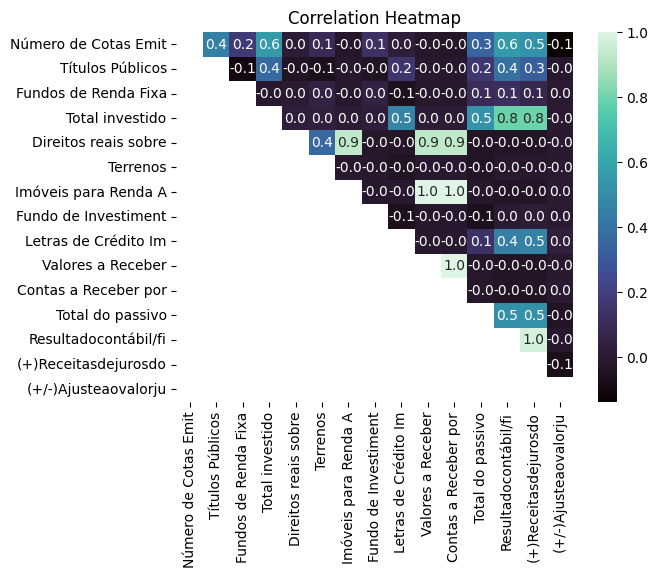

In [201]:
def create_heatmap(corr):
    mask = np.tril(np.ones_like(corr, dtype=bool))
    xticklabels = [col[:20] for col in corr.columns]
    yticklabels = [col[:20] for col in corr.columns]
    sns.heatmap(corr, annot=True, fmt='.1f', cmap='mako', square=False,
                xticklabels=xticklabels, yticklabels=yticklabels, mask=mask)
    plt.title('Correlation Heatmap')
    plt.show()
create_heatmap(X.corr())

In [202]:
y

0         low_risk
1         low_risk
2         low_risk
3      medium_risk
4         low_risk
          ...     
927    medium_risk
931    medium_risk
933    medium_risk
935    medium_risk
936    medium_risk
Name: label, Length: 488, dtype: category
Categories (3, object): ['low_risk' < 'medium_risk' < 'hight_risk']

C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\2608090509.py:3: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


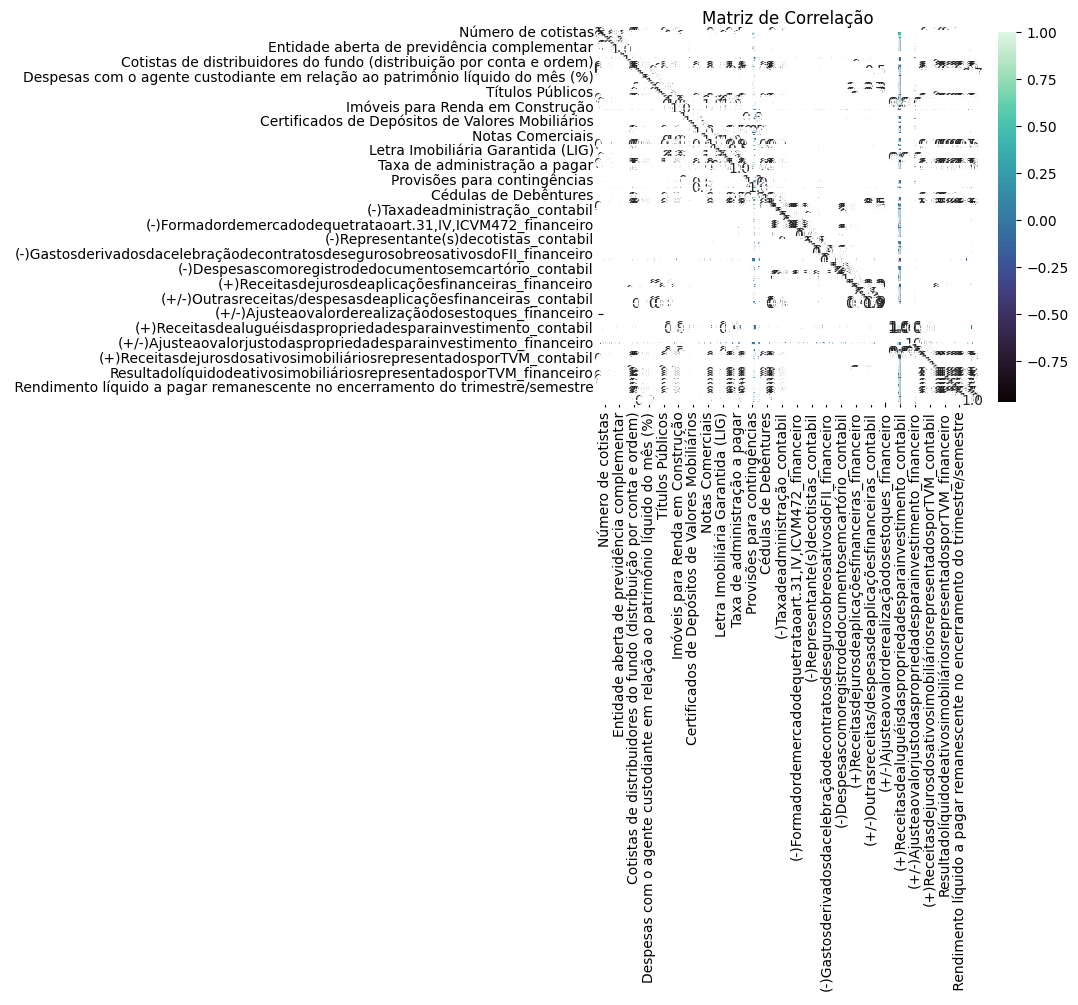

In [203]:
sns.heatmap(corr, annot=True, fmt=".1f", cmap="mako",square=True,)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

In [204]:
dict(sorted(dict_rfe.items(), key=lambda item: item[1]))

{'Número de Cotas Emitidas': 1,
 'Títulos Públicos': 1,
 'Fundos de Renda Fixa': 1,
 'Total investido': 1,
 'Direitos reais sobre bens imóveis': 1,
 'Terrenos': 1,
 'Imóveis para Renda Acabados': 1,
 'Fundo de Investimento Imobiliário (FII)': 1,
 'Letras de Crédito Imobiliário "LCI" (se FIAGRO, Letras de Crédito do Agronegócio "LCA")': 1,
 'Valores a Receber': 1,
 'Contas a Receber por Venda de Imóveis': 1,
 'Total do passivo': 1,
 'Resultadocontábil/financeirotrimestrallíquido_contabil': 1,
 '(+)ReceitasdejurosdosativosimobiliáriosrepresentadosporTVM_contabil': 1,
 '(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro': 1,
 'Patrimônio Líquido – R$': 2,
 'Ativo – R$': 3,
 'Resultadolíquidodosativosimobiliários_contabil': 4,
 'Fundo de Investimento em Direitos Creditórios (FIDC)': 5,
 'Outros valores a pagar': 6,
 'ResultadolíquidodeativosimobiliáriosrepresentadosporTVM_financeiro': 7,
 'Resultadocontábil/financeirotrimestrallíquido_financeiro': 8,
 'Resultadolíqu

### Discretizar os Dados

In [205]:
discretized = pd.DataFrame()
for colum in final.columns:
    qt_cuts = 5
    for i in range(qt_cuts,1,-1):
        try:
            if colum.lower() != 'label':
                print(colum)
                discretized[colum] = pd.qcut(final[colum],q=i, duplicates='drop')
                print(f"Coluna {colum} com {i} cortes")
                break
        except ValueError:
            pass 
discretized['Label'] = y
discretized

Número de cotistas
Coluna Número de cotistas com 5 cortes
Pessoa física
Coluna Pessoa física com 5 cortes
Pessoa jurídica não financeira
Coluna Pessoa jurídica não financeira com 5 cortes
Banco comercial
Coluna Banco comercial com 5 cortes
Corretora ou distribuidora
Coluna Corretora ou distribuidora com 5 cortes
Outras pessoas jurídicas financeiras
Coluna Outras pessoas jurídicas financeiras com 5 cortes
Investidores não residentes
Coluna Investidores não residentes com 5 cortes
Entidade aberta de previdência complementar
Coluna Entidade aberta de previdência complementar com 5 cortes
Entidade fechada de previdência complementar
Coluna Entidade fechada de previdência complementar com 5 cortes
Regime próprio de previdência dos servidores públicos
Coluna Regime próprio de previdência dos servidores públicos com 5 cortes
Sociedade seguradora ou resseguradora
Coluna Sociedade seguradora ou resseguradora com 5 cortes
Sociedade de capitalização e de arrendamento mercantil
Coluna Sociedade de

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,"(28195.8, 106042.0]","(1255.8, 5080.2]","(350.0, 1750.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(10.0, 70.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(-0.001, 1606156.8]","(-0.001, 329374644.0]","(-82509176.8, 0.0]","(-45.001, 0.0]","(-0.001, 835765.0]","(-1287441.001, 24905300.0]","(-0.001, 437279623.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",low_risk
1,"(28195.8, 106042.0]","(-0.001, 1255.8]","(-0.001, 10.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(-0.001, 1606156.8]","(-0.001, 329374644.0]","(-82509176.8, 0.0]","(-45.001, 0.0]","(-0.001, 835765.0]","(-1287441.001, 24905300.0]","(-0.001, 437279623.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",low_risk
2,"(2076.0, 5789.0]","(-0.001, 1255.8]","(-0.001, 10.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(-0.001, 1606156.8]","(-0.001, 329374644.0]","(-82509176.8, 0.0]","(-45.001, 0.0]","(-0.001, 835765.0]","(-1287441.001, 24905300.0]","(-0.001, 437279623.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",low_risk
3,"(11359.4, 28195.8]","(12637.0, 108945.0]","(350.0, 1750.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(10.0, 70.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(29872879.0, 105446465.0]","(6177762639.0, 23749023848.0]","(-262618420493.001, -1394162472.0]","(86275695.0, 4935520523.0]","(835765.0, 990148.2]","(802948174.0, 2127334024.0]","(7729371266.0, 24383439537.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",medium_risk
4,"(28195.8, 106042.0]","(-0.001, 1255.8]","(-0.001, 10.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(29872879.0, 105446465.0]","(6177762639.0, 23749023848.0]","(-262618420493.001, -1394162472.0]","(86275695.0, 4935520523.0]","(835765.0, 990148.2]","(802948174.0, 2127334024.0]","(7729371266.0, 24383439537.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
927,"(28195.8, 106042.0]","(12637.0, 108945.0]","(350.0, 1750.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(1606156.8, 29872879.0]","(67301196945.0, 1062597405635.0]","(-82509176.8, 0.0]","(21599918997.0, 246239076605.0]","(835765.0, 990148.2]","(802948174.0, 2127334024.0]","(67074409995.0, 985291255975.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",medium_risk
931,"(11359.4, 28195.8]","(12637.0, 108945.0]","(350.0, 1750.0]","(-0.001, 20.0]","(-0.001, 20.0]","(-0.001, 570.0]","(-0.001, 10.0]","(-0.001, 10.0]","(-0.001, 50.0]",NaN,...,"(29872879.0, 105446465.0]","(6177762639.0, 23749023848.0]","(-82509176.8, 0.0]","(86275695.0, 4935520523.0]","(990148.2, 1019672.2]","(802948174.0, 2127334024.0]","(7729371266.0, 24383439537.0]","(-0.001, 63346658.0]","(-236522852.001, 0.0]",medium_risk
933,"(11359.4, 28195.8]","(12637.0, 108945.0]","(90.0, 

In [206]:
final['Label'].unique()

array([ 1.00240064e-01,  7.85311377e-02,  1.24045717e-01,  2.28735453e-01,
        8.19735358e-02,  5.96046778e-02,  6.40859948e-02,  6.38266957e-02,
        7.27241431e-02,  8.11125132e-02,  6.24074956e-02,  6.47890144e-02,
        6.39730426e-02,  6.28520606e-02,  7.16257985e-02,  6.59606494e-02,
        6.47805636e-02,  6.94963436e-02,  6.54816254e-02,  8.60344698e-02,
        8.79775286e-02,  8.07519359e-02,  2.85326464e+00,  2.52213315e+00,
        2.78858942e+00,  2.38179203e+00,  2.40619633e+00,  2.41557008e+00,
        2.45544656e+00,  2.44337713e+00,  2.53952305e+00,  2.44175646e+00,
        2.66763535e+00,  2.40894870e+00,  2.46344427e+00,  2.53206610e+00,
        2.75316157e+00,  3.11403199e+00,  2.42521322e+00,  2.35760110e+00,
        2.37487531e+00,  2.39533351e+00,  3.19309244e+00,  2.39392886e+00,
        2.35148329e+00,  2.52144428e+00,  2.47687319e+00,  2.61410611e+00,
        2.40069879e+00,  2.50052824e+00,  2.64376350e+00,  3.36754999e+00,
        3.40842997e+00,  

In [207]:
from sklearn.preprocessing import MinMaxScaler

normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col.lower() != 'label':
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
normalized['Label'] = discretized['Label']
        
normalized

C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\2397308516.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\2397308516.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\2397308516.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

,Número de cotistas,Pessoa física,Pessoa jurídica não financeira,Banco comercial,Corretora ou distribuidora,Outras pessoas jurídicas financeiras,Investidores não residentes,Entidade aberta de previdência complementar,Entidade fechada de previdência complementar,Regime próprio de previdência dos servidores públicos,...,(+) Resultado financeiro que excede o mínimo de 95%⁷.,Rendimentos declarados,(-) Rendimentos pagos antecipadamente durante o trimestre/semestre,Rendimento líquido a pagar remanescente no encerramento do trimestre/semestre,% do resultado financeiro líquido declarado no trimestre/semestre,Resultado financeiro líquido acumulado no trimestre/semestre corrente,"95% do resultado financeiro líquido acumulado (art. 10, p.u., da Lei 8.668/93)",(+) Lucro contábil passível de distribuição que excede ao total do resultado financeiro⁵.,(-) Parcela do resultado financeiro não declarada para distribuição ao longo do trimestre (1º ou 3º),Label
0,0.284122,0.027610,0.262857,0.0,0.0,0.070175,0.714286,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
1,0.280519,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
2,0.027661,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,1.000000,1.827492e-10,0.000000,0.000099,0.000000,0.0,1.0,low_risk
3,0.263543,0.256083,0.274286,0.0,0.0,0.000000,0.857143,0.0,0.0,0.0,...,0.004877,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,medium_risk
4,0.266080,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.004877,0.015609,0.994691,1.073794e-02,0.041736,0.129682,0.016228,0.0,1.0,low_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,0.329448,0.320363,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.001156,0.097685,0.999974,1.461994e-01,0.040792,0.083075,0.103915,0.0,1.0,NaN
484,0.242031,0.235275,0.222857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.003328,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,NaN
485,0.218679,0.212594,0.194286,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.003328,0.007856,0.999976,8.315678e-03,0.042298,0.064453,0.008059,0.0,1.0,low_risk
486,0.141570,0.137629,0.142857,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.002450,0.999997,6.918983e-03,0.040236,0.021200,0.002643,0.0,1.0,low_risk


# SVM

Separar treinamento teste

In [208]:
from sklearn.model_selection import train_test_split
normalized = normalized.dropna()
# Separação: 70% treino, 30% teste (pode ajustar o test_size se quiser)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_train

,Número de Cotas Emitidas,Títulos Públicos,Fundos de Renda Fixa,Total investido,Direitos reais sobre bens imóveis,Terrenos,Imóveis para Renda Acabados,Fundo de Investimento Imobiliário (FII),"Letras de Crédito Imobiliário ""LCI"" (se FIAGRO, Letras de Crédito do Agronegócio ""LCA"")",Valores a Receber,Contas a Receber por Venda de Imóveis,Total do passivo,Resultadocontábil/financeirotrimestrallíquido_contabil,(+)ReceitasdejurosdosativosimobiliáriosrepresentadosporTVM_contabil,(+/-)AjusteaovalorjustodosativosimobiliáriosrepresentadosporTVM_financeiro
524,2141248.0,0.000000e+00,5541001.26,2.007032e+08,0.0,0.0,0.0,0.00,0.00,156346.22,0.0,2561579.31,6249024.35,6909228.25,-10233974.73
911,50000000.0,0.000000e+00,18273538.65,4.911294e+08,23076806.1,23076806.1,0.0,0.00,0.00,390312.19,0.0,6179338.47,15903235.67,15592453.37,-5888.57
792,160099509.0,1.182077e+08,0.00,1.504026e+09,0.0,0.0,0.0,0.00,63480054.30,105001.25,0.0,18096318.43,44403077.24,43918936.51,-25625520.81
772,557019.0,8.944372e+06,0.00,4.460448e+07,0.0,0.0,0.0,0.00,0.00,0.00,0.0,718949.84,3554582.49,3502678.25,-3831607.59
757,557019.0,9.058652e+06,0.00,4.414327e+07,0.0,0.0,0.0,0.00,0.00,6780.10,0.0,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,41380060.0,0.000000e+00,19708305.31,3.714939e+08,0.0,0.0,0.0,8476342.44,0.00,27182.37,0.0,919869.36,12235716.57,14080437.95,-1535815.02
147,494836.0,0.000000e+00,790385.94,4.955290e+07,0.0,0.0,0.0,0.00,0.00,12980.98,0.0,164272.35,1466908.45,1330337.07,-19991.71
741,4165891.0,0.000000e+00,884872.40,4.022468e+07,0.0,0.0,0.0,0.00,0.00,774.17,0.0,101619.16,1604175.94,1592326.64,-12023.89
809,97599509.0,7.345011e+07,0.00,9.238207e+08,0.0,0.0,0.0,0.00,0.00,38038.56,0.0,14678763.86,43464313.41,36872828.65,1242616.85


150
C:0.5, kernel: poly


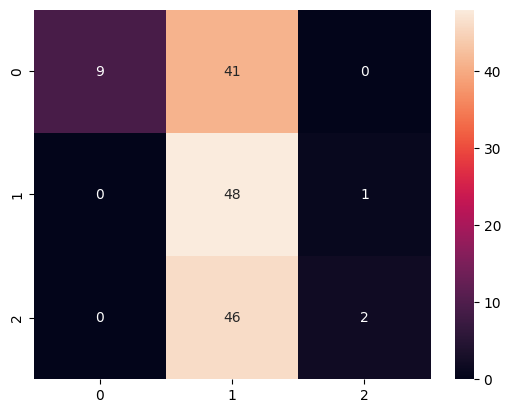

              precision    recall  f1-score   support

  hight_risk       1.00      0.18      0.31        50
    low_risk       0.36      0.98      0.52        49
 medium_risk       0.67      0.04      0.08        48

    accuracy                           0.40       147
   macro avg       0.67      0.40      0.30       147
weighted avg       0.68      0.40      0.30       147

------------------------------------------------------
C:0.5, kernel: rbf


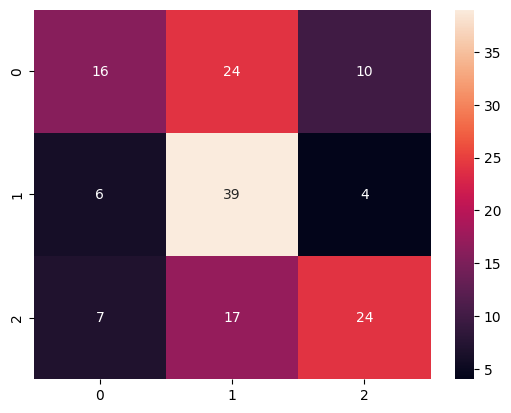

              precision    recall  f1-score   support

  hight_risk       0.55      0.32      0.41        50
    low_risk       0.49      0.80      0.60        49
 medium_risk       0.63      0.50      0.56        48

    accuracy                           0.54       147
   macro avg       0.56      0.54      0.52       147
weighted avg       0.56      0.54      0.52       147

------------------------------------------------------
C:1, kernel: poly


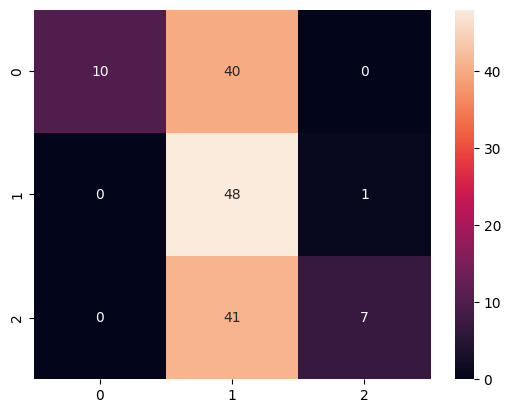

              precision    recall  f1-score   support

  hight_risk       1.00      0.20      0.33        50
    low_risk       0.37      0.98      0.54        49
 medium_risk       0.88      0.15      0.25        48

    accuracy                           0.44       147
   macro avg       0.75      0.44      0.37       147
weighted avg       0.75      0.44      0.37       147

------------------------------------------------------
C:1, kernel: rbf


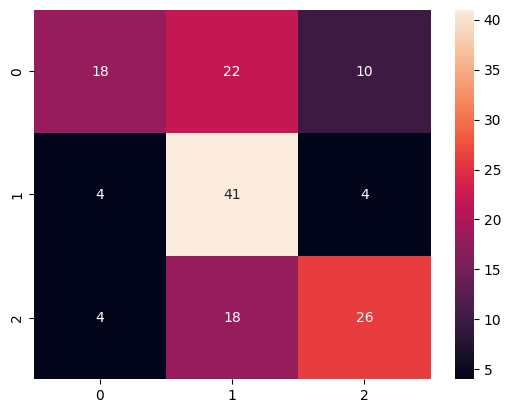

              precision    recall  f1-score   support

  hight_risk       0.69      0.36      0.47        50
    low_risk       0.51      0.84      0.63        49
 medium_risk       0.65      0.54      0.59        48

    accuracy                           0.58       147
   macro avg       0.62      0.58      0.57       147
weighted avg       0.62      0.58      0.56       147

------------------------------------------------------
C:10, kernel: poly


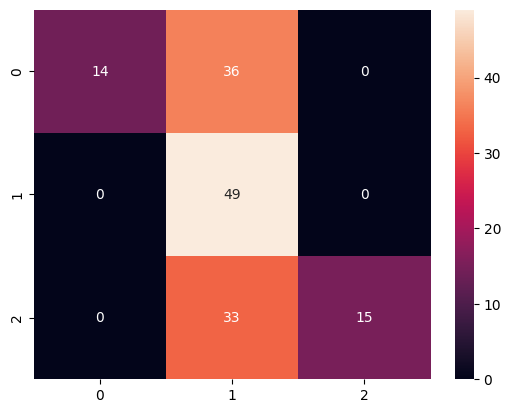

              precision    recall  f1-score   support

  hight_risk       1.00      0.28      0.44        50
    low_risk       0.42      1.00      0.59        49
 medium_risk       1.00      0.31      0.48        48

    accuracy                           0.53       147
   macro avg       0.81      0.53      0.50       147
weighted avg       0.81      0.53      0.50       147

------------------------------------------------------
C:10, kernel: rbf


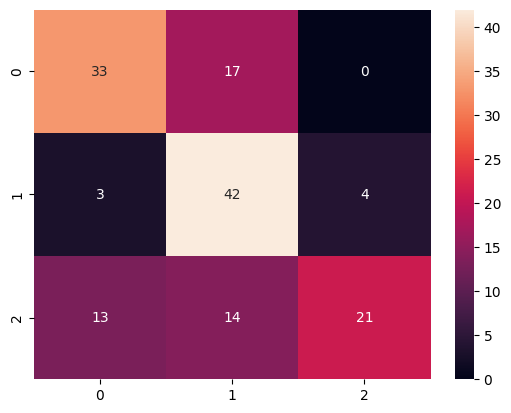

              precision    recall  f1-score   support

  hight_risk       0.67      0.66      0.67        50
    low_risk       0.58      0.86      0.69        49
 medium_risk       0.84      0.44      0.58        48

    accuracy                           0.65       147
   macro avg       0.70      0.65      0.64       147
weighted avg       0.70      0.65      0.64       147

------------------------------------------------------


In [214]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC
cs = [.5,1,10]
kernels = ['poly','rbf']
X_resampla,y_resample = smote.fit_resample(X_test,y_test)
print(y_resample.count())
for c in cs:
    for kernel in kernels:
        svc = SVC(kernel=kernel,C=c,probability=True, decision_function_shape='ovo', random_state=0)
        svc.fit(X=X_resampla,y=y_resample)
        y_predict = svc.predict(X=X_test)
        print(f'C:{c}, kernel: {kernel}')
        sns.heatmap(confusion_matrix(y_true=y_test,y_pred=y_predict),annot=True,fmt='d')
        plt.show()
        # print(confusion_matrix(y_true=y_test,y_pred=y_predict))
        print(classification_report(y_test, y_predict))
        print('------------------------------------------------------')
        
        


Número de cotistas
Pessoa física
Pessoa jurídica não financeira
Banco comercial
Corretora ou distribuidora
Outras pessoas jurídicas financeiras
Investidores não residentes
Entidade aberta de previdência complementar
Entidade fechada de previdência complementar
Regime próprio de previdência dos servidores públicos
Sociedade seguradora ou resseguradora
Sociedade de capitalização e de arrendamento mercantil
Fundos de investimento imobiliário
Outros fundos de investimento
Cotistas de distribuidores do fundo (distribuição por conta e ordem)
Outros tipos de cotistas não relacionados
Ativo – R$
Patrimônio Líquido – R$
Número de Cotas Emitidas
Valor Patrimonial das Cotas – R$
Despesas com a taxa de administração em relação ao patrimônio líquido do mês (%)
Despesas com o agente custodiante em relação ao patrimônio líquido do mês (%)
Rentabilidade Efetiva Mensal (%)
Rentabilidade Patrimonial do Mês de Referência² (%)
Dividend Yield do Mês de Referência³ (%)
Amortizações de cotas do Mês de Referê

C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\195866582.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\195866582.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  normalized[col] = scaler.fit_transform(final[[col]]).flatten()
C:\Users\Kire\AppData\Local\Temp\ipykernel_15212\195866582.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, 

Random Forest (n_estimators=10) - Matriz de Confusão:

Random Forest - Acurácia:
0.8843537414965986

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.88      0.92      0.90        50
    low_risk       0.91      0.86      0.88        49
 medium_risk       0.86      0.88      0.87        48

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.89      0.88      0.88       147

Random Forest (n_estimators=100) - Matriz de Confusão:

Random Forest - Acurácia:
0.9047619047619048

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.92      0.92      0.92        50
    low_risk       0.92      0.92      0.92        49
 medium_risk       0.88      0.88      0.88        48

    accuracy                           0.90       147
   macro avg       0.90      0.90      0.90       147
we

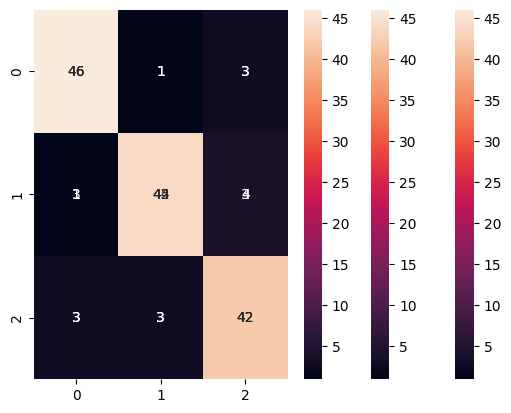

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Normalização dos dados
normalized = pd.DataFrame()
scaler = MinMaxScaler()

for col in final.columns:
    if col.lower() != 'label':
        print(col)
        normalized[col] = scaler.fit_transform(final[[col]]).flatten()
    else:
        normalized[col] = discretized['Label']  # mantém o Label

# Removendo NaN
normalized = normalized.dropna()

X = X

# Separação em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_train, y_train)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot=True, fmt='d')
    # print(confusion_matrix(y_test, y_predict_rf))

    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))
# Aplicando Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)

# Avaliação do modelo Random Forest
print("Random Forest - Matriz de Confusão:")
print(confusion_matrix(y_test, y_predict_rf))

print("\nRandom Forest - Acurácia:")
print(accuracy_score(y_test, y_predict_rf))

print("\nRandom Forest - Relatório de Classificação:")
print(classification_report(y_test, y_predict_rf))


In [ ]:
y_train.value_counts()

label
hight_risk     116
medium_risk    113
low_risk       112
Name: count, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Rodar o Random Forest novamente
n_estimators = (10, 100, 1000)
for n_estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=n_estimator, random_state=0)
    rf.fit(X_resampled, y_resampled)
    y_predict_rf = rf.predict(X_test)

    # Avaliação do modelo Random Forest
    print(f"Random Forest (n_estimators={n_estimator}) - Matriz de Confusão:")
    sns.heatmap(confusion_matrix(y_test, y_predict_rf), annot=True, fmt='d')
    plt.show()
    print("\nRandom Forest - Acurácia:")
    print(accuracy_score(y_test, y_predict_rf))

    print("\nRandom Forest - Relatório de Classificação:")
    print(classification_report(y_test, y_predict_rf))

Random Forest (n_estimators=10) - Matriz de Confusão:

Random Forest - Acurácia:
0.8775510204081632

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.90      0.90      0.90        50
    low_risk       0.89      0.86      0.88        49
 medium_risk       0.84      0.88      0.86        48

    accuracy                           0.88       147
   macro avg       0.88      0.88      0.88       147
weighted avg       0.88      0.88      0.88       147

Random Forest (n_estimators=100) - Matriz de Confusão:

Random Forest - Acurácia:
0.891156462585034

Random Forest - Relatório de Classificação:
              precision    recall  f1-score   support

  hight_risk       0.90      0.92      0.91        50
    low_risk       0.92      0.90      0.91        49
 medium_risk       0.85      0.85      0.85        48

    accuracy                           0.89       147
   macro avg       0.89      0.89      0.89       147
wei

                                              Feature  Importance
0                            Número de Cotas Emitidas    0.241449
3                                     Total investido    0.153959
11                                   Total do passivo    0.087769
9                                   Valores a Receber    0.074181
1                                    Títulos Públicos    0.071289
12  Resultadocontábil/financeirotrimestrallíquido_...    0.068049
2                                Fundos de Renda Fixa    0.065969
14  (+/-)Ajusteaovalorjustodosativosimobiliáriosre...    0.064511
13  (+)Receitasdejurosdosativosimobiliáriosreprese...    0.064360
7             Fundo de Investimento Imobiliário (FII)    0.045850


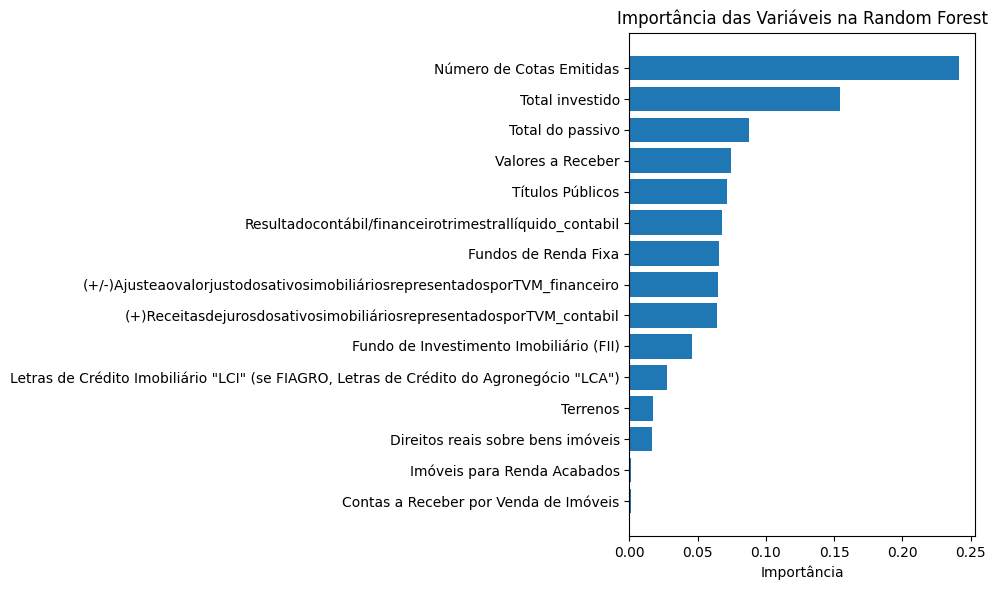

In [ ]:
importances = rf.feature_importances_
feature_names = X_train.columns  # Nomes das colunas do dataset

# Criar um DataFrame para visualização
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Exibir as 10 variáveis mais importantes
print(feature_importance_df.head(10))

# Visualizar com um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis na Random Forest')
plt.gca().invert_yaxis()  # Inverter para as mais importantes aparecerem no topo
plt.tight_layout()
plt.show()

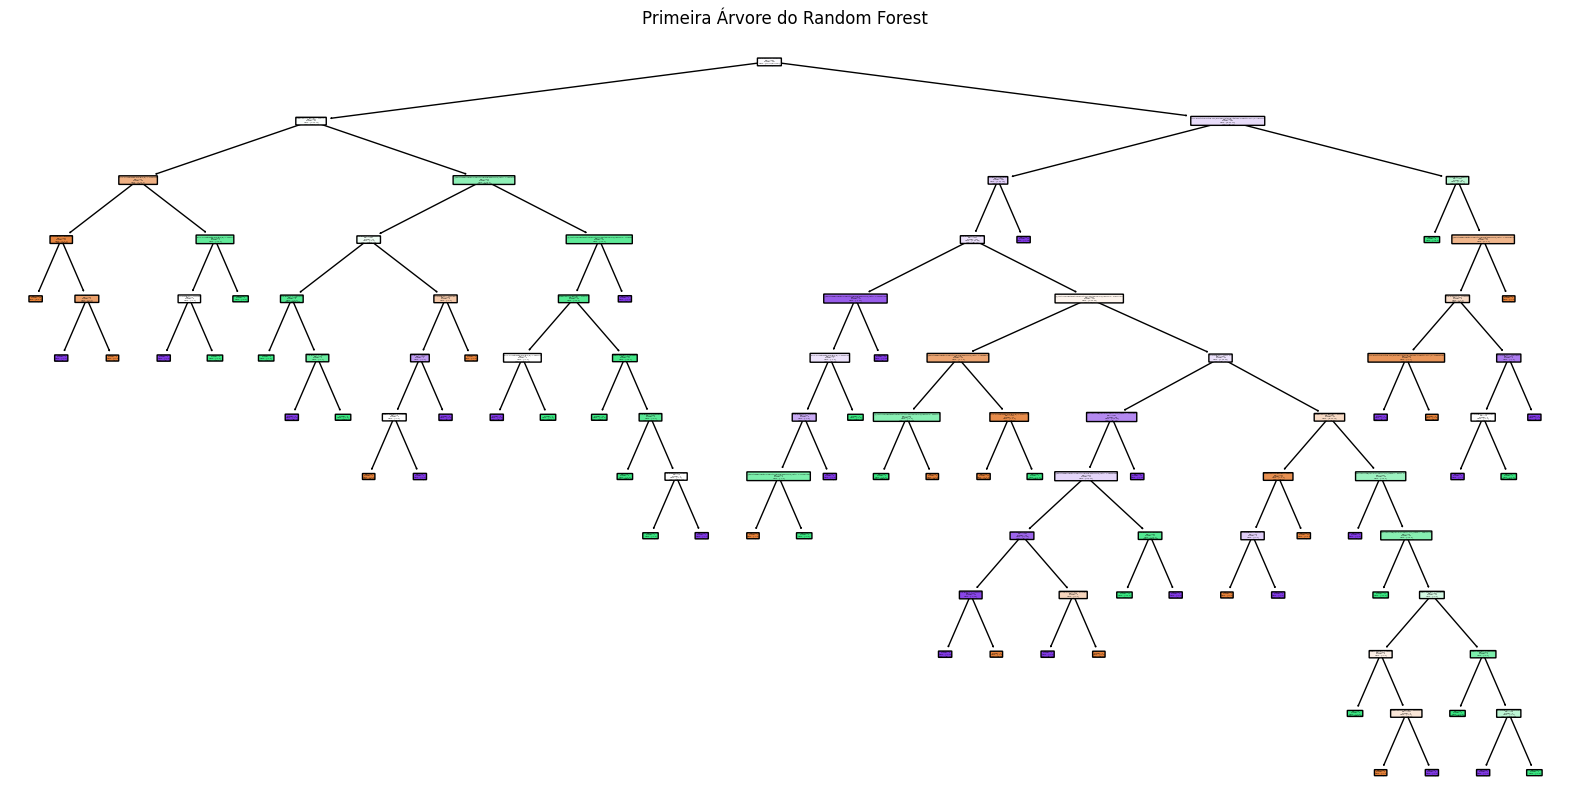

In [ ]:
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

# Acessar a primeira árvore do Random Forest
first_tree = rf.estimators_[0]

# Plotar a árvore
plt.figure(figsize=(20, 10))
plot_tree(first_tree, feature_names=X.columns, class_names=y.cat.categories, filled=True, rounded=True,)
plt.title("Primeira Árvore do Random Forest")
plt.show()

# RNA

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# Modelo com duas camadas intermediárias utilizando ReLU.
model_relu = Sequential([
    Dense(64, input_dim=15),
    Activation('relu'),
    Dense(32),
    Activation('relu'),
    Dense(3),
    Activation('softmax')
])

model_relu.compile(optimizer=Adam(learning_rate=0.001), 
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

model_relu.summary()


Defaulting to user installation because normal site-packages is not writeable
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 10.1 MB/s eta 0:00:38
   ---------------------------------------- 4.5/376.0 MB 11.7 MB/s eta 0:00:32
    --------------------------------------- 7.1/376.0 MB 11.5 MB/s eta 0:00:33
   - -------------------------------------- 9.4/376.0 MB 11.7 MB/s eta 0:00:32
   - -------------------------------------- 11.5/376.0 MB 11.1 MB/s eta 0:00:33
   - -------------------------------------- 13.1/376.0 MB 10.7 MB/s eta 0:00:34
   - -------------------------------------- 14.7/376.0 MB 10.1 MB/s eta 0:00:36
   - -------------------------------------- 16.5/376.0 MB 10.0 MB/s eta 0:00:36
   - -------------------------------------- 18.6/376.0 MB 10.0 MB/s eta 0:00:36
   -- ------------------------------------- 20.7/376.0 MB 10.0 MB/s eta 

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Kire\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Kire\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'tensorflow.python'

In [ ]:
X_train.dtypes
# y_train.dtypes

Corretora ou distribuidora                                                    float64
Outras pessoas jurídicas financeiras                                          float64
Outros fundos de investimento                                                 float64
Valor Patrimonial das Cotas – R$                                              float64
Fundo de Investimento Imobiliário (FII)                                       float64
Outros Valores a Receber                                                      float64
Rendimentos a distribuir                                                      float64
Resultadocontábil/financeirotrimestrallíquido_contabil                        float64
(-)Taxadeadministração_financeiro                                             float64
(-)Taxadeadministração_contabil                                               float64
(-)Empresaespecializadadequetrataoart.31,III,ICVM472_financeiro               float64
(-)Auditoriaindependente_financeiro                   

In [ ]:
# Convert categorical labels to one-hot encoding
y_train_encoded = tf.keras.utils.to_categorical(y_train.cat.codes, num_classes=3)
y_test_encoded = tf.keras.utils.to_categorical(y_test.cat.codes, num_classes=3)

# Train the model
model_relu.fit(X_train, y_train_encoded, epochs=10, batch_size=32)

# Avaliação do modelo
y_predict_relu = model_relu.predict(X_test)
y_predict_relu = tf.argmax(y_predict_relu, axis=1)
y_test_decoded = tf.argmax(y_test_encoded, axis=1)



Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3586 - loss: 1.0930
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4660 - loss: 1.0471 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4529 - loss: 1.0145
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4880 - loss: 0.9807
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4325 - loss: 0.9915
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4479 - loss: 0.9847
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6563 - loss: 0.9348
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7003 - loss: 0.9409
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6956 - loss: 0.9421
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7316 - loss: 0.9058 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [ ]:
print("Modelo ReLU - Matriz de Confusão:")
sns.heatmap(confusion_matrix(y_test_decoded, y_predict_relu), annot=True, fmt='d')
print(classification_report(y_test_decoded, y_predict_relu))

Modelo ReLU - Matriz de Confusão:
[[24  0  4]
 [ 3  0  8]
 [ 2  0 25]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        28
           1       0.00      0.00      0.00        11
           2       0.68      0.93      0.78        27

    accuracy                           0.74        66
   macro avg       0.50      0.59      0.54        66
weighted avg       0.63      0.74      0.68        66



/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Configurações para testar
num_layers_options = [1, 2, 3]  # Número de camadas ocultas
neurons_per_layer_options = [16, 32, 64]  # Número de neurônios por camada
activation_functions = ['relu', 'tanh', 'sigmoid']  # Funções de ativação
output_activation = 'softmax'  # Função de ativação da camada de saída
learning_rate = 0.001  # Taxa de aprendizado
epochs = 50  # Número máximo de épocas
batch_size = 32  # Tamanho do lote

# Early stopping para evitar overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Loop para testar diferentes configurações
for num_layers in num_layers_options:
    for neurons in neurons_per_layer_options:
        for activation in activation_functions:
            print(f"Testing configuration: {num_layers} layers, {neurons} neurons/layer, {activation} activation")

            # Construção do modelo
            model = Sequential()
            model.add(Dense(neurons, input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            for _ in range(num_layers - 1):
                model.add(Dense(neurons))
                model.add(Activation(activation))
            model.add(Dense(3))  # 3 classes de saída
            model.add(Activation(output_activation))

            # Compilação do modelo
            model.compile(optimizer=Adam(learning_rate=learning_rate),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

            # Treinamento do modelo
            model.fit(X_train, y_train_encoded,
                      validation_data=(X_test, y_test_encoded),
                      epochs=epochs,
                      batch_size=batch_size,
                      callbacks=[early_stopping],
                      verbose=0)

            # Avaliação do modelo
            y_predict = model.predict(X_test)
            y_predict_classes = np.argmax(y_predict, axis=1)
            y_test_classes = np.argmax(y_test_encoded, axis=1)

            print("Confusion Matrix:")
            sns.heatmap(confusion_matrix(y_test_classes, y_predict_classes), annot=True, fmt='d')            print("Classification Report:")
            print(classification_report(y_test_classes, y_predict_classes))
            print("------------------------------------------------------")

Testing configuration: 1 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Confusion Matrix:
[[21  0  7]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1       0.00      0.00      0.00        11
           2       0.63      1.00      0.77        27

    accuracy                           0.73        66
   macro avg       0.51      0.58      0.53        66
weighted avg       0.64      0.73      0.66        66

------------------------------------------------------
Testing configuration: 1 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/stepWARNING:tensorflow:6 out of the last 9 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x78ead016aca0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[21  0  7]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.75      0.82        28
           1    

/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[24  0  4]
 [ 2  0  9]
 [ 2  0 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.00      0.00      0.00        11
           2       0.66      0.93      0.77        27

    accuracy                           0.74        66
   macro avg       0.51      0.59      0.54        66
weighted avg       0.63      0.74      0.68        66

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 2  0 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.00      0.00      0.00        11
           2       0.64      0.93      0.76        27

    accuracy                           0.73        66
   macro avg       0.50      0.58      0.53        66
weighted avg       0.62      0.73      0.66        66

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 1 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Confusion Matrix:
[[22  0  6]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.00      0.00      0.00        11
           2       0.64      1.00      0.78        27

    accuracy                           0.74        66
   macro avg       0.52      0.60      0.54        66
weighted avg       0.65      0.74      0.68        66

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Confusion Matrix:
[[20  0  8]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.71      0.80        28
           1       0.00      0.00      0.00        11
           2       0.61      1.00      0.76        27

    accuracy                           0.71        66
   macro avg       0.51      0.57      0.52        66
weighted avg       0.64      0.71      0.65        66

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Confusion Matrix:
[[23  0  5]
 [ 3  0  8]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.00      0.00      0.00        11
           2       0.68      1.00      0.81        27

    accuracy                           0.76        66
   macro avg       0.52      0.61      0.55        66
weighted avg       0.65      0.76      0.69        66

------------------------------------------------------
Testing configuration: 2 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Confusion Matrix:
[[28  0  0]
 [11  0  0]
 [24  0  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.62        28
           1       0.00      0.00      0.00        11
           2       1.00      0.11      0.20        27

    accuracy                           0.47        66
   macro avg       0.48      0.37      0.27        66
weighted avg       0.60      0.47      0.34        66

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[24  0  4]
 [ 4  0  7]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.00      0.00      0.00        11
           2       0.71      1.00      0.83        27

    accuracy                           0.77        66
   macro avg       0.52      0.62      0.56        66
weighted avg       0.65      0.77      0.70        66

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Confusion Matrix:
[[23  2  3]
 [ 4  4  3]
 [ 0  1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.57      0.36      0.44        11
           2       0.81      0.96      0.88        27

    accuracy                           0.80        66
   macro avg       0.75      0.72      0.72        66
weighted avg       0.79      0.80      0.79        66

------------------------------------------------------
Testing configuration: 2 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Confusion Matrix:
[[22  0  6]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.00      0.00      0.00        11
           2       0.64      1.00      0.78        27

    accuracy                           0.74        66
   macro avg       0.52      0.60      0.54        66
weighted avg       0.65      0.74      0.68        66

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[25  0  3]
 [ 4  2  5]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       1.00      0.18      0.31        11
           2       0.77      1.00      0.87        27

    accuracy                           0.82        66
   macro avg       0.88      0.69      0.69        66
weighted avg       0.85      0.82      0.78        66

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  6  3]
 [ 0  1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.60      0.55      0.57        11
           2       0.87      0.96      0.91        27

    accuracy                           0.85        66
   macro avg       0.80      0.79      0.79        66
weighted avg       0.85      0.85      0.85        66

------------------------------------------------------
Testing configuration: 2 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Confusion Matrix:
[[22  0  6]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.00      0.00      0.00        11
           2       0.64      1.00      0.78        27

    accuracy                           0.74        66
   macro avg       0.52      0.60      0.54        66
weighted avg       0.65      0.74      0.68        66

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[24  0  4]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.00      0.00      0.00        11
           2       0.68      1.00      0.81        27

    accuracy                           0.77        66
   macro avg       0.53      0.62      0.56        66
weighted avg       0.67      0.77      0.71        66

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[23  0  5]
 [ 2  0  9]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.82      0.87        28
           1       0.00      0.00      0.00        11
           2       0.66      1.00      0.79        27

    accuracy                           0.76        66
   macro avg       0.53      0.61      0.55        66
weighted avg       0.66      0.76      0.69        66

------------------------------------------------------
Testing configuration: 3 layers, 16 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
[[28  0  0]
 [11  0  0]
 [27  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.60        28
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27

    accuracy                           0.42        66
   macro avg       0.14      0.33      0.20        66
weighted avg       0.18      0.42      0.25        66

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[27  0  1]
 [ 7  0  4]
 [ 1  0 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.86        28
           1       0.00      0.00      0.00        11
           2       0.84      0.96      0.90        27

    accuracy                           0.80        66
   macro avg       0.54      0.64      0.58        66
weighted avg       0.67      0.80      0.73        66

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  8  1]
 [ 0  1 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.67      0.73      0.70        11
           2       0.93      0.96      0.95        27

    accuracy                           0.88        66
   macro avg       0.84      0.85      0.84        66
weighted avg       0.88      0.88      0.88        66

------------------------------------------------------
Testing configuration: 3 layers, 32 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Confusion Matrix:
[[ 0  0 28]
 [ 0  0 11]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        11
           2       0.41      1.00      0.58        27

    accuracy                           0.41        66
   macro avg       0.14      0.33      0.19        66
weighted avg       0.17      0.41      0.24        66

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, relu activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  8  1]
 [ 0  2 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.62      0.73      0.67        11
           2       0.93      0.93      0.93        27

    accuracy                           0.86        66
   macro avg       0.82      0.84      0.83        66
weighted avg       0.87      0.86      0.87        66

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, tanh activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Confusion Matrix:
[[24  3  1]
 [ 2  8  1]
 [ 0  2 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.62      0.73      0.67        11
           2       0.93      0.93      0.93        27

    accuracy                           0.86        66
   macro avg       0.82      0.84      0.83        66
weighted avg       0.87      0.86      0.87        66

------------------------------------------------------
Testing configuration: 3 layers, 64 neurons/layer, sigmoid activation


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Confusion Matrix:
[[ 2  0 26]
 [ 0  0 11]
 [ 0  0 27]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.13        28
           1       0.00      0.00      0.00        11
           2       0.42      1.00      0.59        27

    accuracy                           0.44        66
   macro avg       0.47      0.36      0.24        66
weighted avg       0.60      0.44      0.30        66

------------------------------------------------------


/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/kire/Área de trabalho/tcc/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",